In [16]:
from IPython.display import Markdown as md
from pathlib import Path
md(Path("readme.md").read_text())

This repository contains Python code and a Jupyter Notebook
running the original [CONTIN program by S. Provencher](http://dx.doi.org/10.1016/0010-4655(82)90174-6)
on every DLS measurement (dynamic light scattering, aka. photon correlation spectroscopy, PCS)
read from `*.ASC` files at the specified angle found in the given subfolders.
The expected input file format is `ALV-7004 CGS-8F Data` which is found at the first line of each file.

### Documentation of some parts:

https://bamresearch.github.io/analyse_dls_with_contin

### Also as PDF:

https://bamresearch.github.io/analyse_dls_with_contin/analyse-dls-with-contin.pdf


## TODO
- fix multicore (parallel) calc on Windows
- [done] plot measured and fitted correlation curve
- [done] reviewed units of *ptRange* and *fitRange* CONTIN parameters
  - *fitRange* is given in meters now
- [done] output peak statistics with uncertainties
  - by calculating the statistics of lower and upper distribution (uncertainty subtracted from and added to distribution result) and using the max. absolute value
- [done] float formatting in CONTIN input file fixed
- [done] output CONTIN error message if no output was generated

# Some Parameters (please adjust)

## Specify the measurement folder
(And mind the scattering angle in a cell further down!)

In [2]:
dataDir = 'testdata/mw002-03'

## Find data files

In [3]:
import jupyter_analysis_tools
jupyter_analysis_tools.utils.setPackage(globals())

Setting the current directory as package 'analyse_dls_with_contin':
  /Users/ingo/code/particle_concentration_from_dls/analyse_dls_with_contin.


In [4]:
from jupyter_analysis_tools.datalocations import getDataDirs, getDataFiles
dataDirs = getDataDirs(dataDir, noWorkDir=True)
#dataFiles = getDataFiles(dataDirs, include="*raged.ASC")#, exclude="_average")
dataFiles = getDataFiles(dataDirs, include="*.ASC", exclude="_average")
dataFiles

Working in current directory '/Users/ingo/code/particle_concentration_from_dls/analyse_dls_with_contin'.
Entering '/Users/ingo/code/particle_concentration_from_dls/analyse_dls_with_contin/testdata/mw002-03':
     .ipynb_checkpoints
     contin_026 7 2021 MW002-030000_0001
     contin_026 7 2021 MW002-030000_0002
     [...]
     contin_146 7 2021 MW002-030001_0002
     contin_146 7 2021 MW002-030001_0003
     mw002-03
6 files to be analyzed in subdirectories.


['/Users/ingo/code/particle_concentration_from_dls/analyse_dls_with_contin/testdata/mw002-03/7 2021 MW002-030000_0001.ASC',
 '/Users/ingo/code/particle_concentration_from_dls/analyse_dls_with_contin/testdata/mw002-03/7 2021 MW002-030000_0002.ASC',
 '/Users/ingo/code/particle_concentration_from_dls/analyse_dls_with_contin/testdata/mw002-03/7 2021 MW002-030000_0003.ASC',
 '/Users/ingo/code/particle_concentration_from_dls/analyse_dls_with_contin/testdata/mw002-03/7 2021 MW002-030001_0001.ASC',
 '/Users/ingo/code/particle_concentration_from_dls/analyse_dls_with_contin/testdata/mw002-03/7 2021 MW002-030001_0002.ASC',
 '/Users/ingo/code/particle_concentration_from_dls/analyse_dls_with_contin/testdata/mw002-03/7 2021 MW002-030001_0003.ASC']

## CONTIN parameters

In [5]:
# percentage of fit range width to ignore boundary peaks/artefacts on
# (enlarged range is fitted and result is cropped)
fitRangeCrop = 30
continConfig = dict(recalc=True,
    ptRangeSec=(3e-7, 1e0), fitRangeM=(1e-9, 300e-9), gridpts=200,
    transformData=True, baselineCoeffs=0, # N_L
    # weighs noise level of data points accordinly for photon correlation spectroscopy
    # where the variance of Y is proportional to (Y**2+1)/(4*Y**2)
    # (from contin.for, line 1430)
    weighResiduals=True,
)
if fitRangeCrop > 0 and fitRangeCrop < 100:
    continConfig['fitRangeM'] = (continConfig['fitRangeM'][0]*(1-fitRangeCrop/100),
                                 continConfig['fitRangeM'][1]*(1+fitRangeCrop/100))
continConfig

{'recalc': True,
 'ptRangeSec': (3e-07, 1.0),
 'fitRangeM': (7e-10, 3.8999999999999997e-07),
 'gridpts': 200,
 'transformData': True,
 'baselineCoeffs': 0,
 'weighResiduals': True}

In [6]:
from jupyter_analysis_tools.utils import updatedDict
angles = [26, 34, 42, 50, 58, 66, 74, 82, 90, 98, 106, 114, 122, 130, 138, 146]
continConfigs = [updatedDict(continConfig, 'angle', angle)
                 for angle in (angles #74, 90, 130, 138
                             )
                ]
#continConfigs

# Process given data directory

## Run CONTIN on each file

In [7]:
from .contin import runContinOverFiles
from IPython.display import clear_output
def updateCellOutput(text):
    clear_output(wait=True) # clears the jupterlab cell output
    print(text, flush=True)
resultDirs = runContinOverFiles(dataFiles, continConfigs, nthreads=None,
                                outputCallback=updateCellOutput)
#resultDirs

/Users/ingo/code/particle_concentration_from_dls/analyse_dls_with_contin/testdata/mw002-03/contin_074 7 2021 MW002-030000_0001/contin_in.txt:
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

Scattering angle 82 not found!
    Skipping '7 2021 MW002-030000_0001.ASC'.
/Users/ingo/code/particle_concentration_from_dls/analyse_dls_with_contin/testdata/mw002-03/contin_138 7 2021 MW002-030000_0002/contin_in.txt:
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

Scattering angle 146 not found!
    Skipping '7 2021 MW002-030000_0002.ASC'.
Scattering angle 74 not found!
    Skipping '7 2021 MW002-030001_0001.ASC'.
/Users/ingo/code/particle_concentration_from_dls/analyse_dls_with_contin/testdata/mw002-03/contin_082 7 2021 MW002-030001_0001/contin_in.txt:
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

Scattering angle 138 not found!
    Skipping '7 2021 M

#### Runtime log (for reference):
- for 3 measurements at 16 angles (=48): CONTIN analysis with 12 threads took 15.7,16.3,16.2 s.

## Fetch CONTIN results

### A single result curve

{'score': 1.0, 'temp': 292.93, 'angle': 58.0, 'visc': 0.0010069999999999999, 'refrac': 1.332, 'wavelen': 6.328e-07, 'dataFilename': PosixPath('/Users/ingo/code/particle_concentration_from_dls/analyse_dls_with_contin/testdata/mw002-03/7 2021 MW002-030000_0001.ASC')}


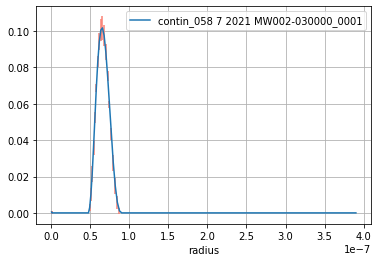

In [8]:
from .contin import getContinResults
# show first result for testing
dn = resultDirs[2]
dfDistrib, dfFit, varmap = getContinResults(dn)
dfDistrib.plot('radius', 'distrib', yerr='err', ecolor='salmon', grid=True, label=dn.name);
print(varmap);

### Testing a measure of uncertainties level along the curve

In [9]:
from jupyter_analysis_tools.distrib import normalizeDistrib, findPeakRanges, findLocalMinima
ranges = findPeakRanges(dfDistrib.radius, dfDistrib.distrib, tol=1e-6)
#findLocalMinima(ranges, dfDistrib.radius.values, dfDistrib.distrib.values, doPlot=True, verbose=True)

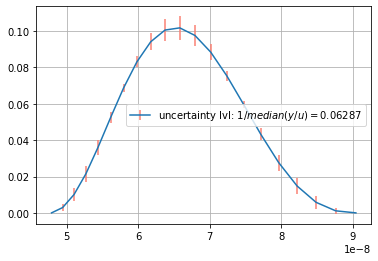

In [10]:
import matplotlib.pyplot as plt
import numpy as np
for istart, iend in ranges:
    x = dfDistrib.radius.values[istart:iend+1]
    y = dfDistrib.distrib.values[istart:iend+1]
    u = dfDistrib.err.values[istart:iend+1]
    idx = np.where(y>0)
    div = y[idx]/u[idx]
    plt.errorbar(x, y, yerr=u, ecolor='salmon', label=r"uncertainty lvl: $1/median(y/u)=$"+f"{1/np.median(div):.4g}")
    plt.grid(True);plt.legend()
    #print(y[idx])
    #print(u[idx])
    print()

### Test modified z-score for the count rate

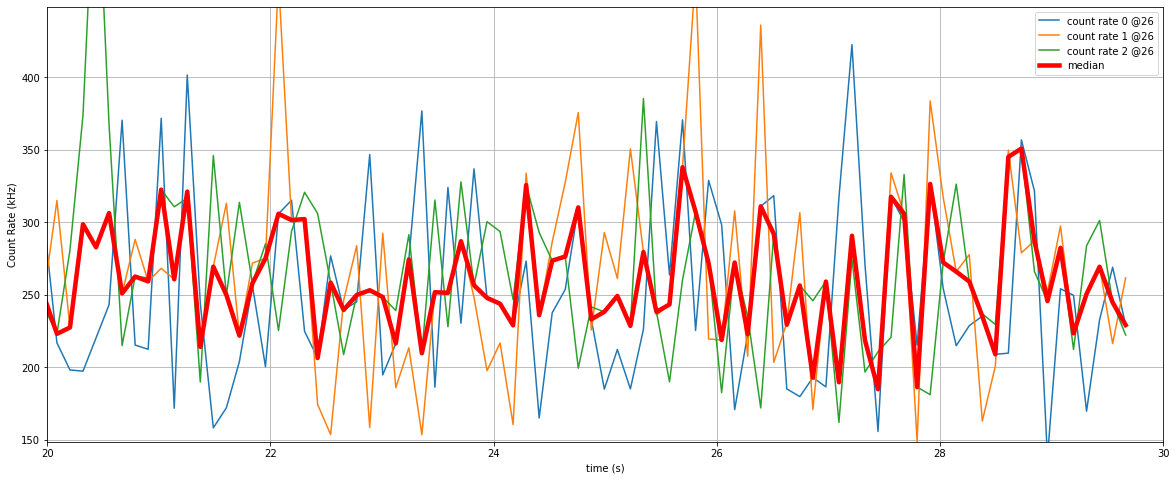

In [11]:
from .dlshelpers import getDLSgammaSi, getDLSFileData
from jupyter_analysis_tools.plotting import lineWidth
angle = 26
times = getDLSFileData(dataFiles[0])['countrate'].index.values
countrates = np.stack([getDLSFileData(fn)['countrate'][angle].values for fn in dataFiles
                       if angle in getDLSFileData(fn)['countrate']])
median = np.median(countrates, axis=0)
plt.figure(figsize=(20,8))
plt.plot(times,countrates.T,
         label=[f"count rate {i} @{angle}" for i in range(countrates.shape[0])])
plt.plot(times, median, lw=lineWidth()*3, color="red", label="median")
plt.xlabel("time (s)"); plt.ylabel("Count Rate (kHz)")
plt.grid(); plt.legend();
plt.xlim((20,30)); plt.ylim((median.min(), median.max()));

In [12]:
from jupyter_analysis_tools.analysis import getModZScore
diff = np.sqrt(np.sum((countrates - median)**2, axis=-1))
dict(diff=diff, med_abs_deviation=np.median(diff), scores=getModZScore(countrates))

{'diff': array([1058.16453593,  882.90800014,  890.54534171]),
 'med_abs_deviation': 890.5453417061929,
 'scores': array([1.18822084, 0.99142397, 1.        ])}

## Plot results from all files
(The generalized object-oriented way, for an option of incorporating other methods than CONTIN too)

In [13]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from jupyter_analysis_tools.plotting import plotColor, initFigure, lineWidth
from jupyter_analysis_tools.distrib import area, integrate, distrParLatex
from jupyter_analysis_tools.distrib import normalizeDistrib, findPeakRanges, findLocalMinima, Distribution
from .contin import getContinResults
from .dlshelpers import getDLSFileData

class ContinResult:
    name = "CONTIN"
    xColumn = "radius"; yColumn = "distrib"; uColumn = "err"
    getResults = getContinResults
    color = plotColor(1)

class Results:
    def __init__(self, filename, rtype=None):
        self.rtype = rtype
        self.sampleDir = Path(filename)
        self.angle     = None
        self.dfDistrib, self.dfFit, self.varmap = self.rtype.getResults(self.sampleDir, self.angle)
        if fitRangeCrop > 0 and fitRangeCrop < 100:
            # cropping distribution result by *fitRangeCrop* CONTIN parameter above
            # percentage of fit range width to ignore boundary peaks/artefacts on
            rmin = self.dfDistrib.radius.min()/(1-fitRangeCrop/100)
            rmax = self.dfDistrib.radius.max()/(1+fitRangeCrop/100)
            #print(rmin, rmax)
            rmin = np.argwhere(self.dfDistrib.radius.values > rmin)[0][0]
            rmax = np.argwhere(self.dfDistrib.radius.values < rmax)[-1][0]
            #print(rmin, rmax)
            self.dfDistrib = self.dfDistrib[rmin:rmax+1]
        if self.dfDistrib is None: return
        self.distrib = Distribution(self.dfDistrib[self.rtype.xColumn],
                                    self.dfDistrib[self.rtype.yColumn],
                                    self.dfDistrib[self.rtype.uColumn], maxPeakCount=1)

    def plot(self, axes, subplotIdx=0):
        if self.dfDistrib is None: return
        self.plotCountRate(axes[subplotIdx])
        self.plotCorrelationWithFit(axes[subplotIdx+1])
        distPar, _ = self.distrib.peakDistrPar(plotAxes=axes, plotAxisStart=subplotIdx+3)
        self.distrib.plot(axes[subplotIdx+2], distPar, name=self.rtype.name)

    def plotCountRate(self, ax):
        indata = getDLSFileData(self.varmap['dataFilename'])
        angle = self.varmap['angle']
        cr = indata['countrate']
        cr.plot(y=angle, ax=ax, grid=True, lw=0.5,
                label=( f"@{angle:.0f}°"
                       +r", $\overline{CR}$="+f"{cr[angle].mean():.1f} kHz"
                       +f", score: {self.varmap['score']}" if 'score' in self.varmap else ""),
                xlabel="time (s)", ylabel="Count Rate (kHz)")

    def plotCorrelationWithFit(self, ax):
        """plot fitted correlation curve with residual"""
        ax.plot(self.dfFit['tau'], self.dfFit['corrIn'],
               color="black", lw=lineWidth()*2, label="measured")
        ax.plot(self.dfFit['tau'], self.dfFit['corrFit'],
               color=self.rtype.color, label="fit")
        ax.legend()
        ax2 = ax.twinx()
        residual = self.dfFit['corrIn']-self.dfFit['corrFit']
        ax2.plot(self.dfFit['tau'], residual, 'k.', alpha=.3, label="residual")
        ax2.set_ylim([-max(abs(residual)),max(abs(residual))])
        # combine legends
        ax2handles, ax2labels = ax2.get_legend_handles_labels()
        axhandles, axlabels = ax.get_legend_handles_labels()
        ax.legend(axhandles+ax2handles, axlabels+ax2labels)
        ax.set_xlabel(r"$\tau$ (s)"); ax.grid(); ax.set_xscale("log");

def plotResult(filename, withCountRate=False):
    filename = Path(filename)
    # CONTIN results
    cnt = Results(filename, rtype=ContinResult)
    if not cnt.distrib.peaks:
        return # nothing to do
    nsubplots = 2+len(cnt.distrib.peaks)+1
    fig, axes = plt.subplots(1, nsubplots, dpi=100, gridspec_kw=dict(wspace=.4))
    initFigure(fig, width=nsubplots*120, aspectRatio=nsubplots/1., quiet=True)
    fig.suptitle("…"+str(filename)[-60:], fontsize=10)
    cnt.plot(axes)
    plt.savefig(filename.with_suffix('.png'))
    return cnt

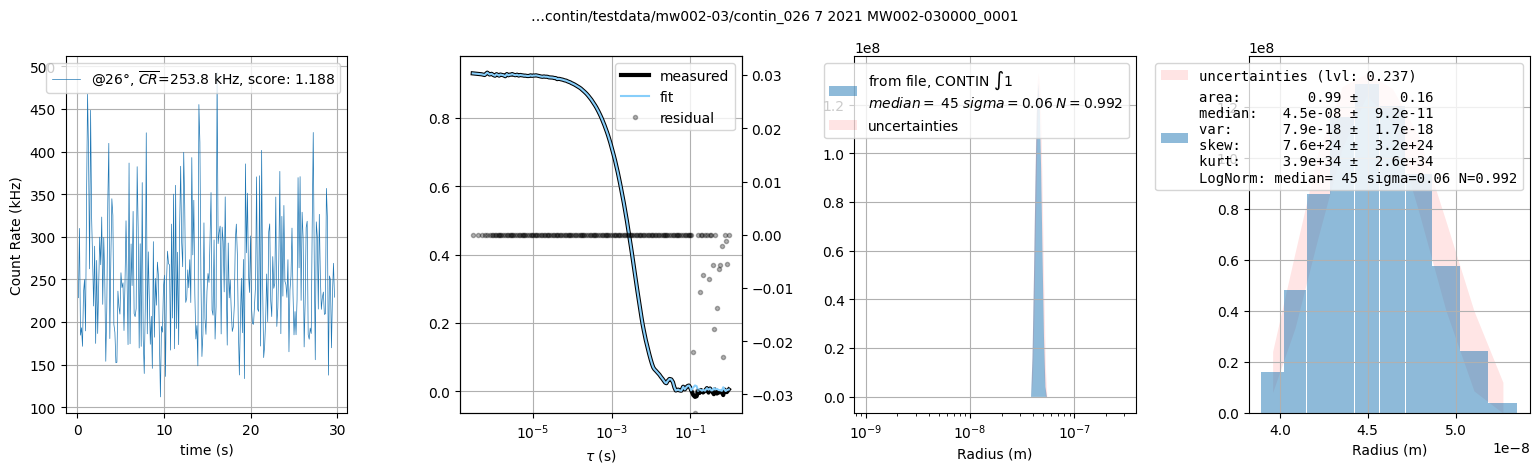

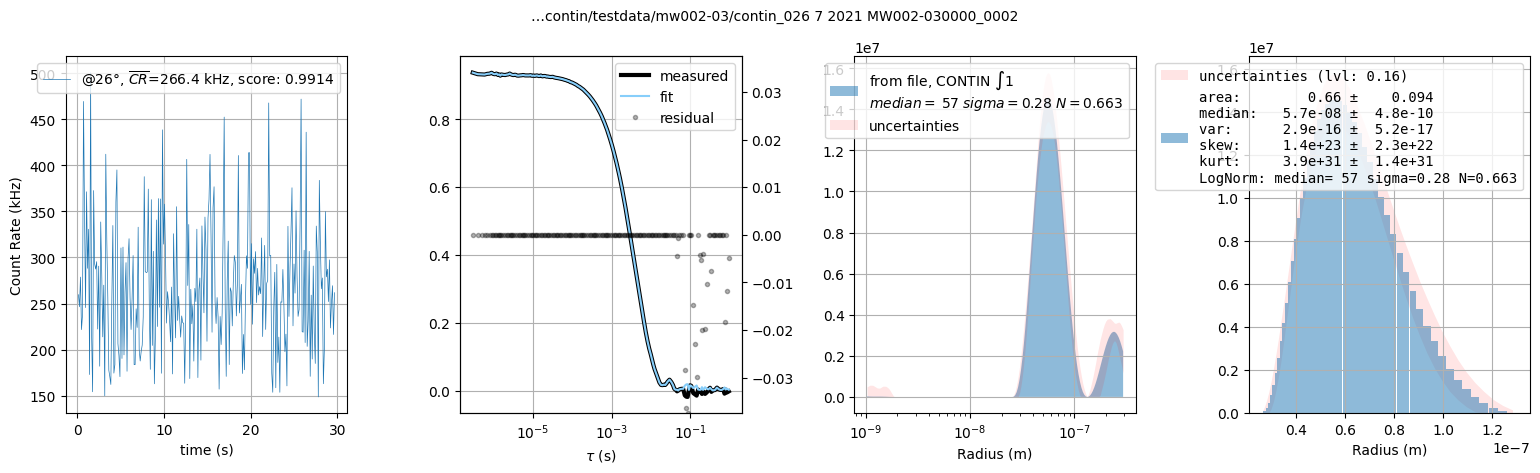

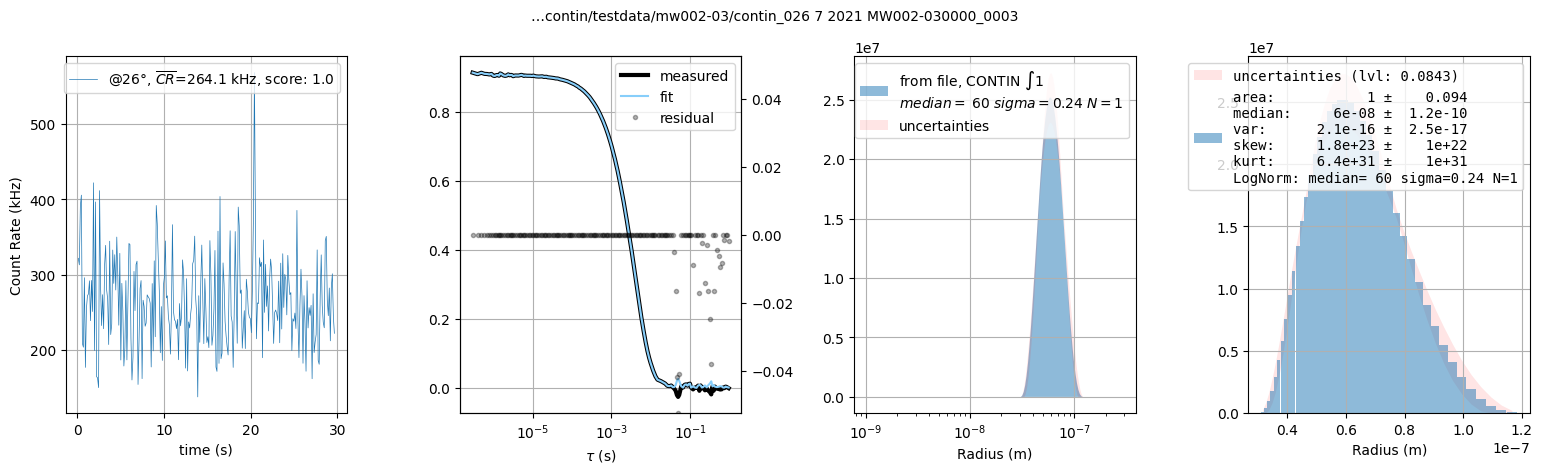

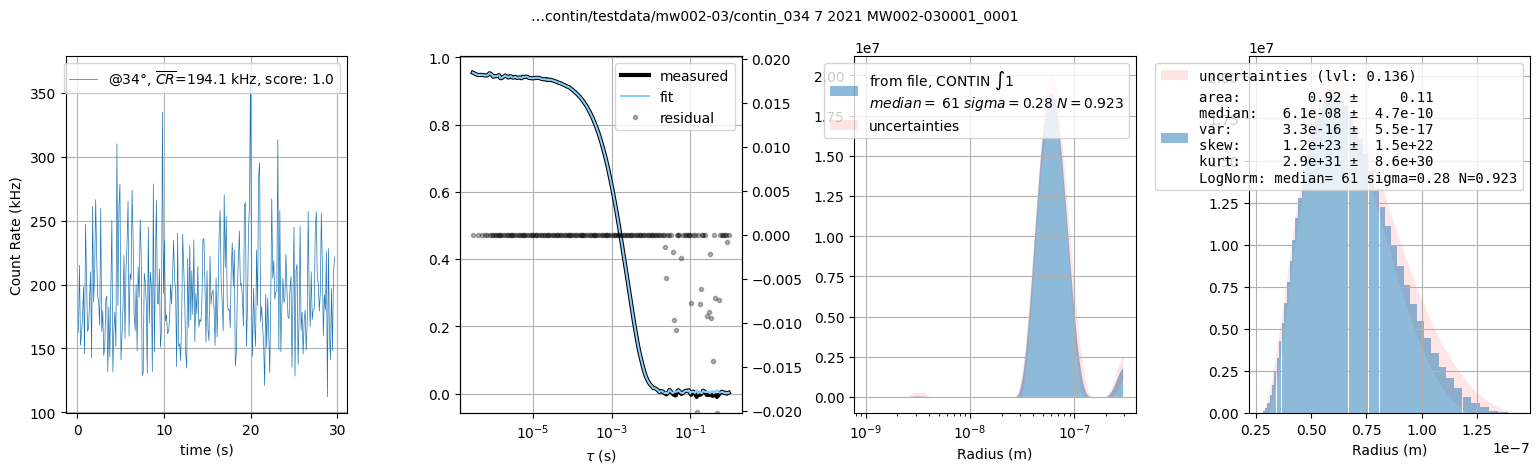

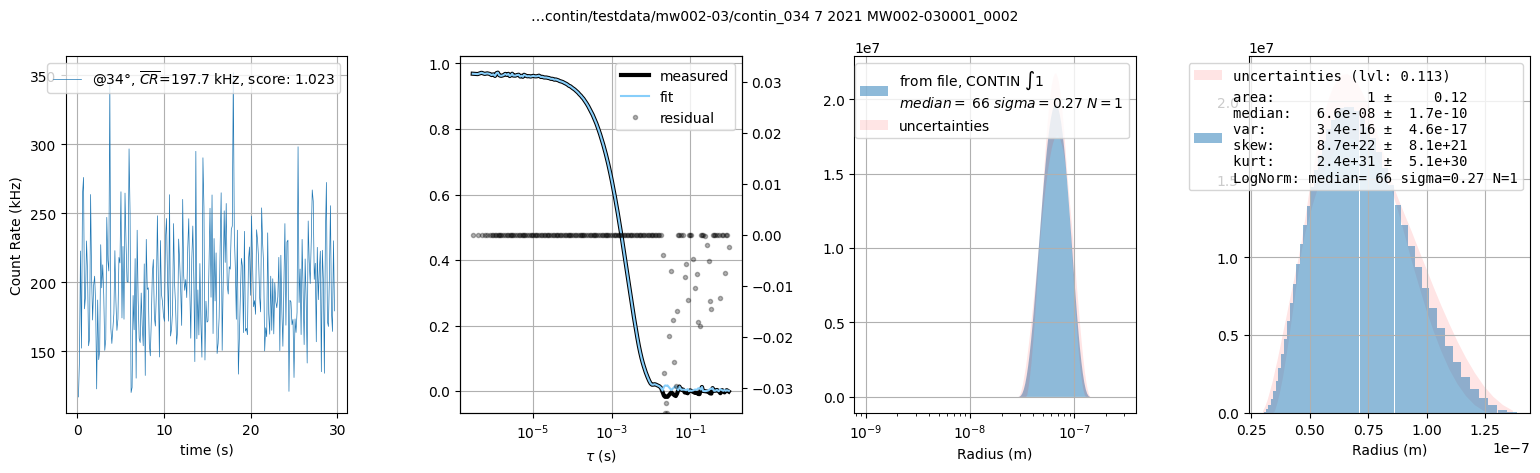

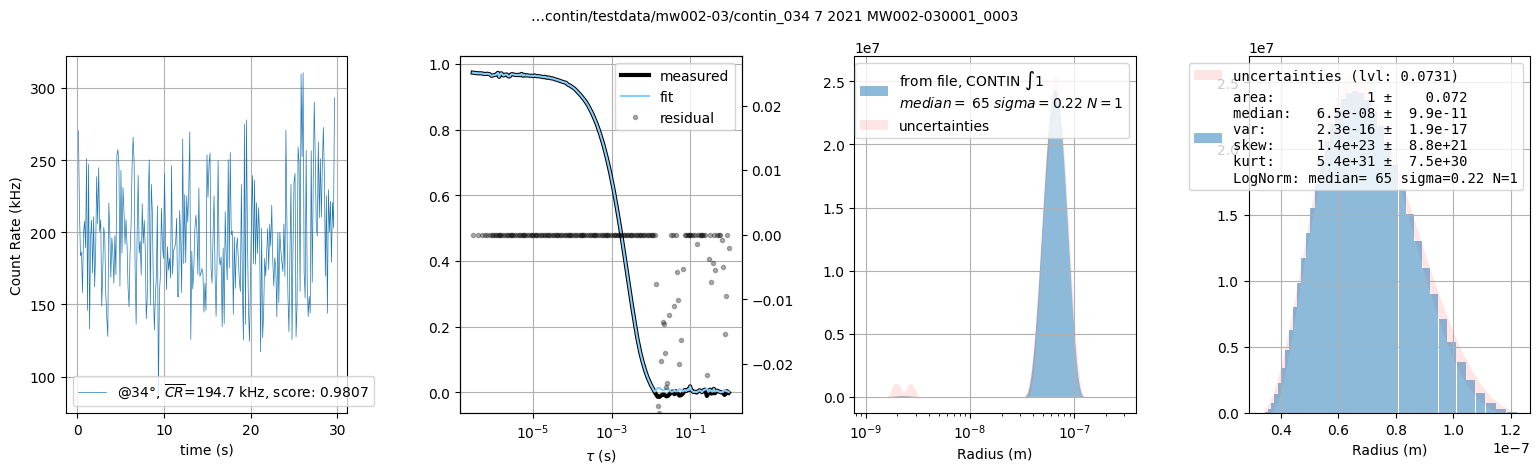

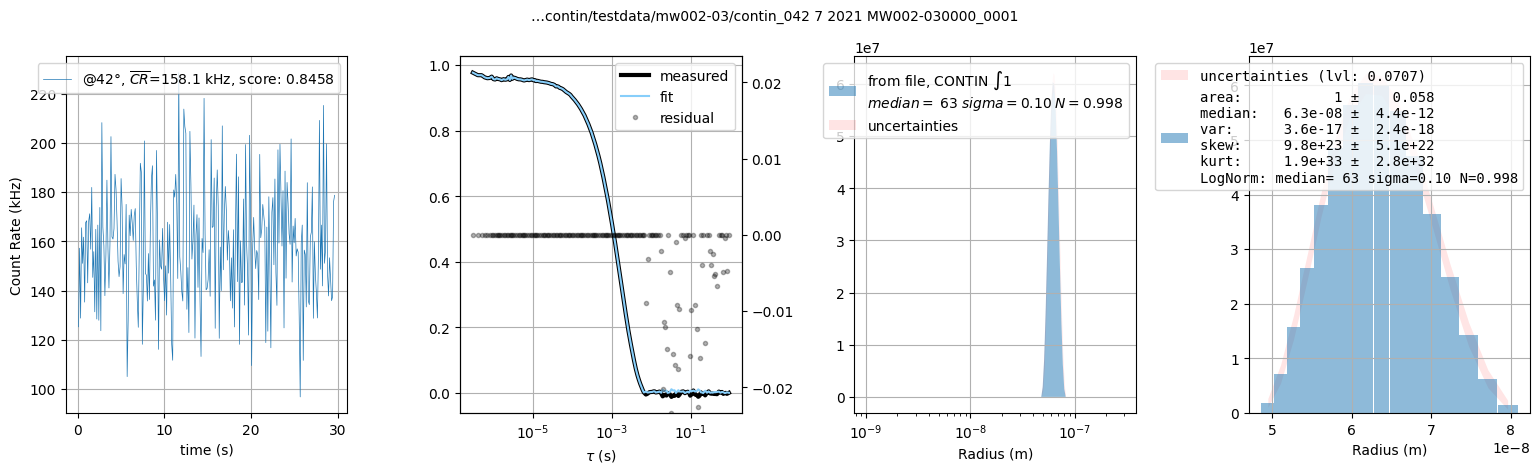

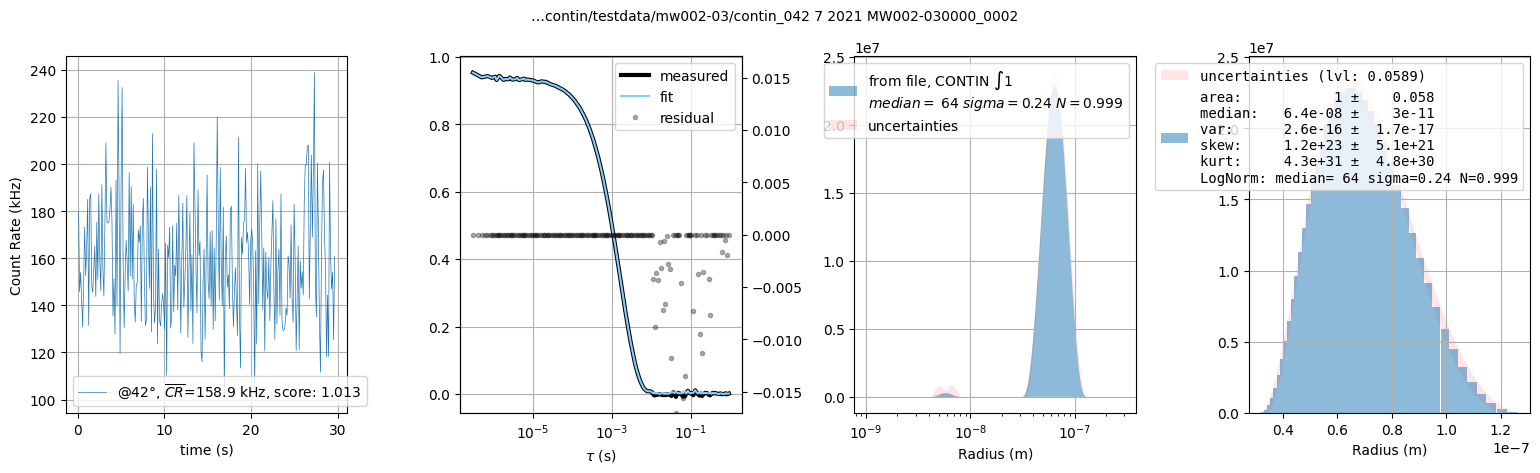

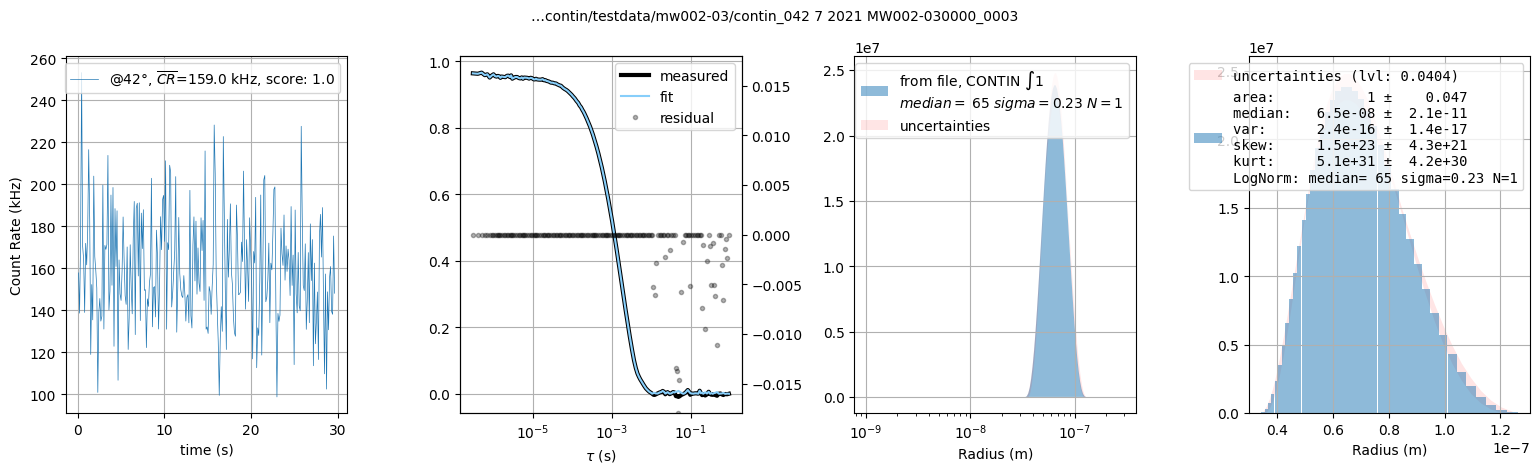

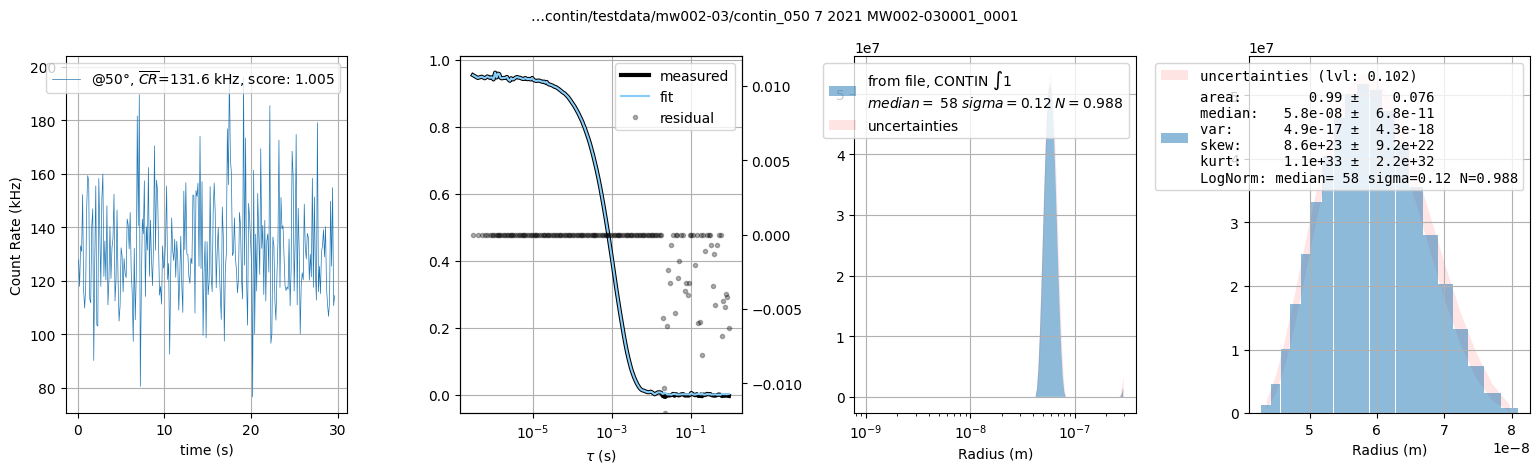

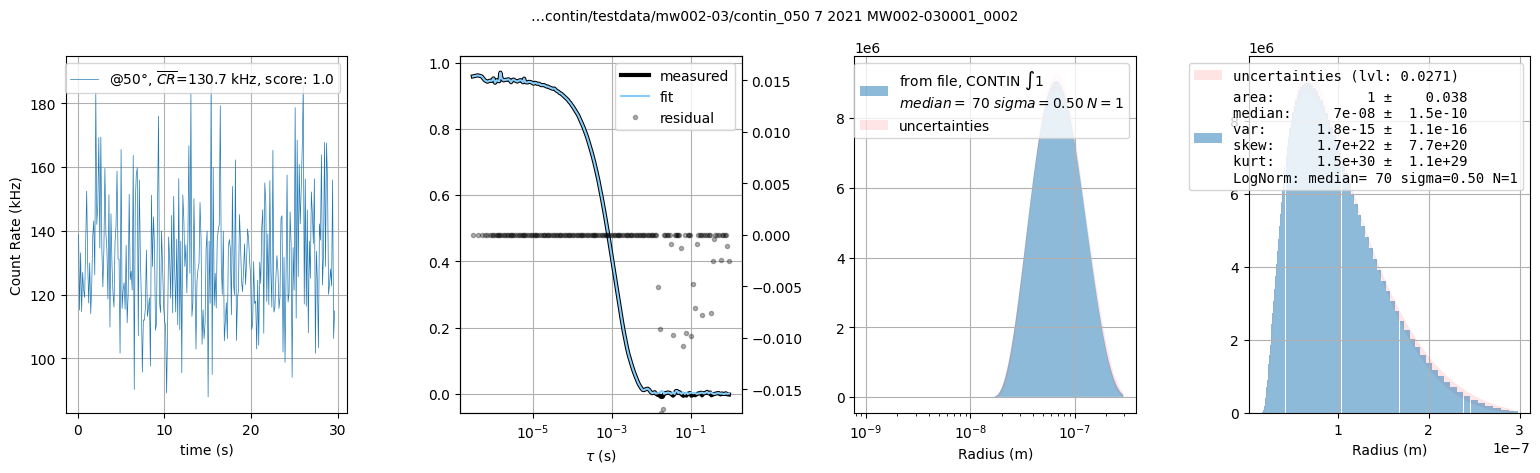

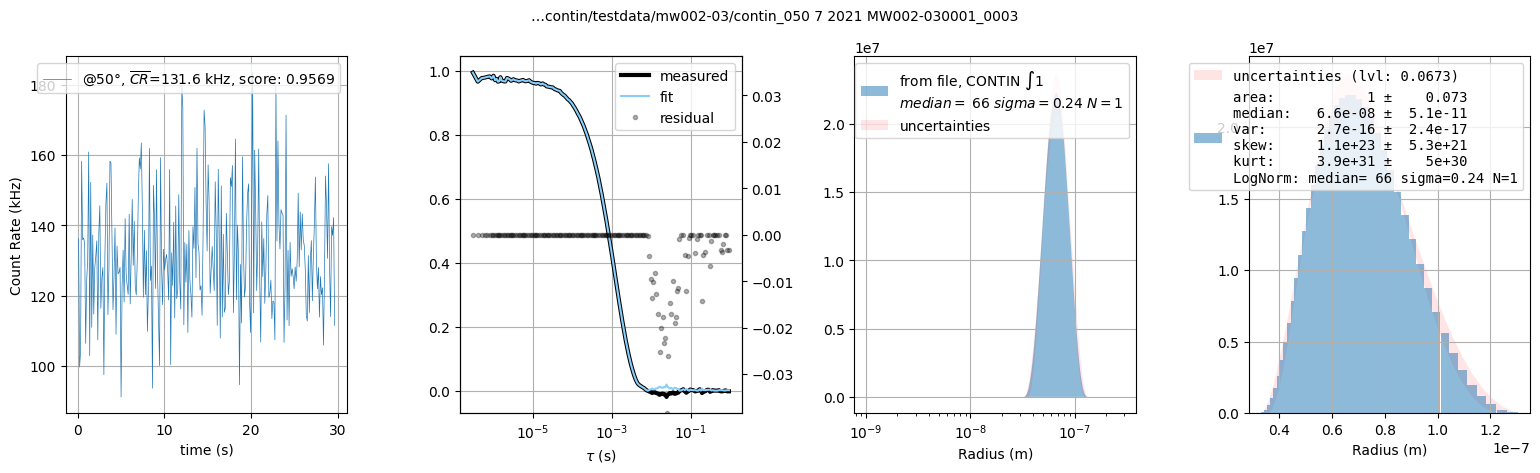

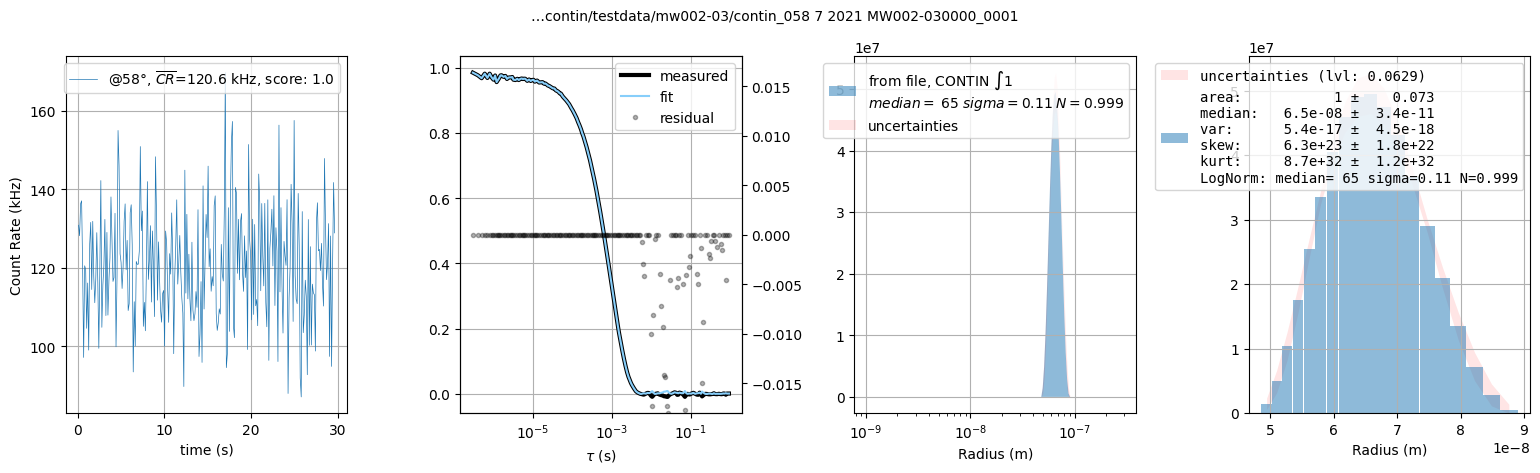

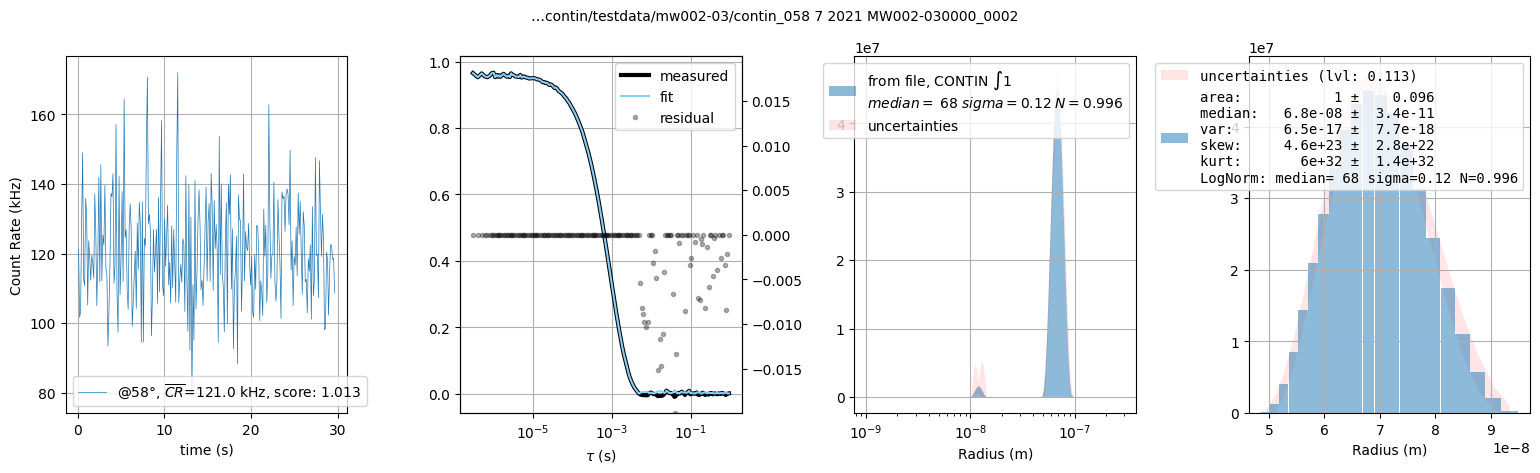

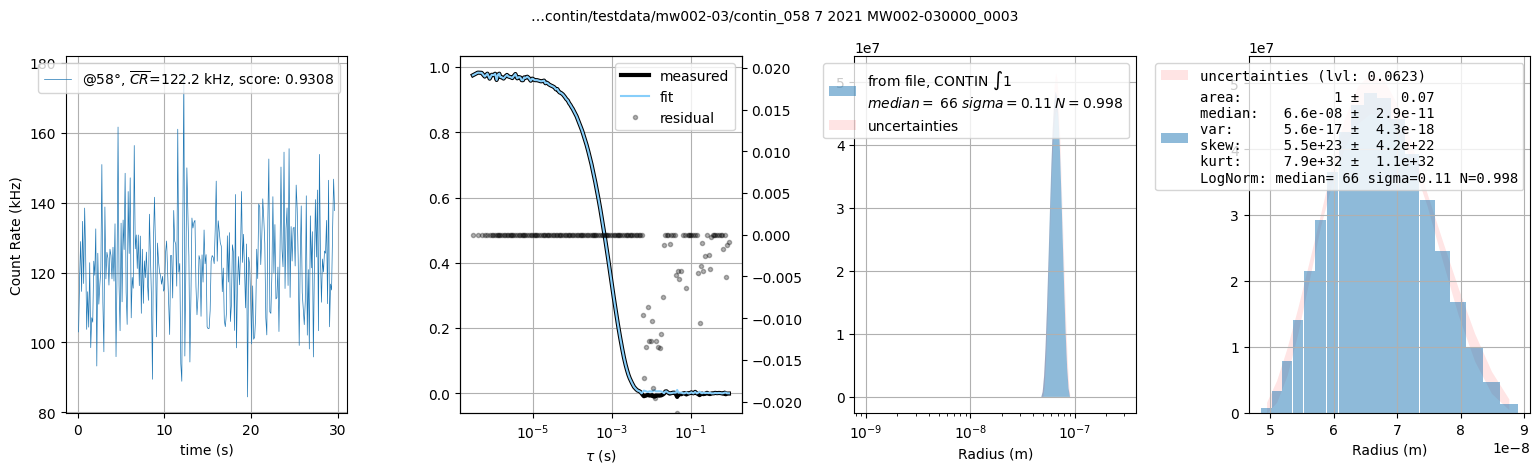

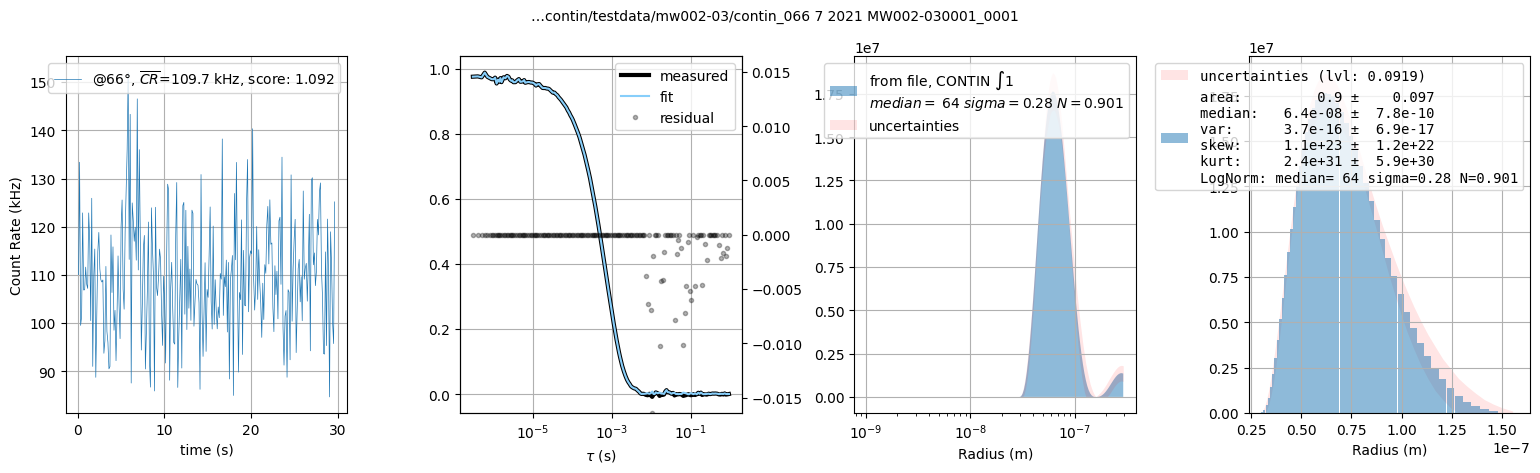

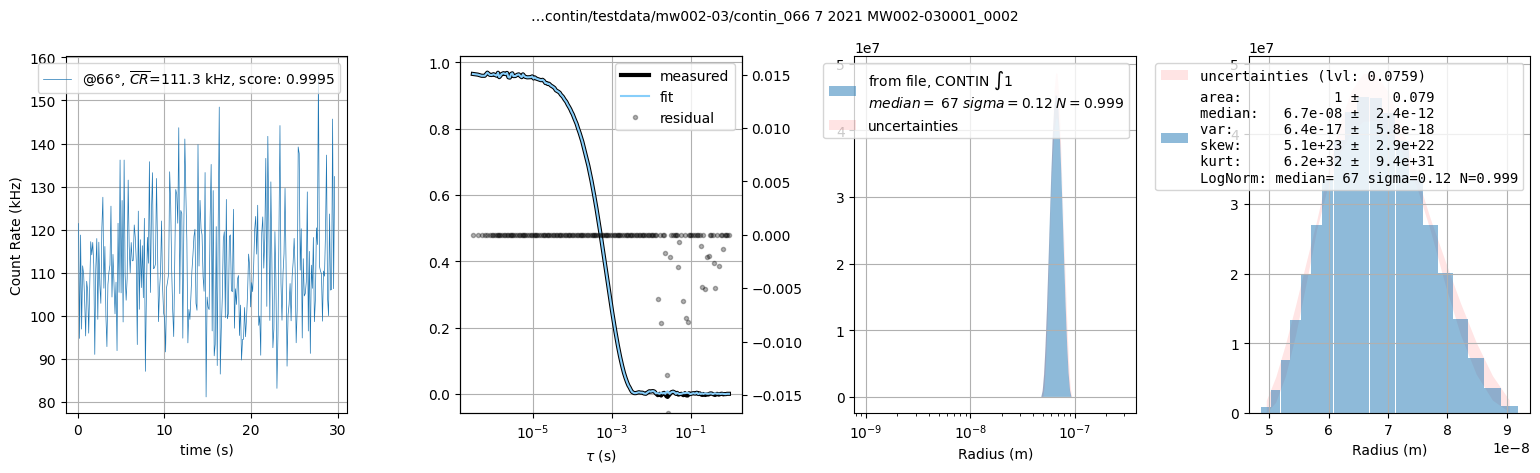

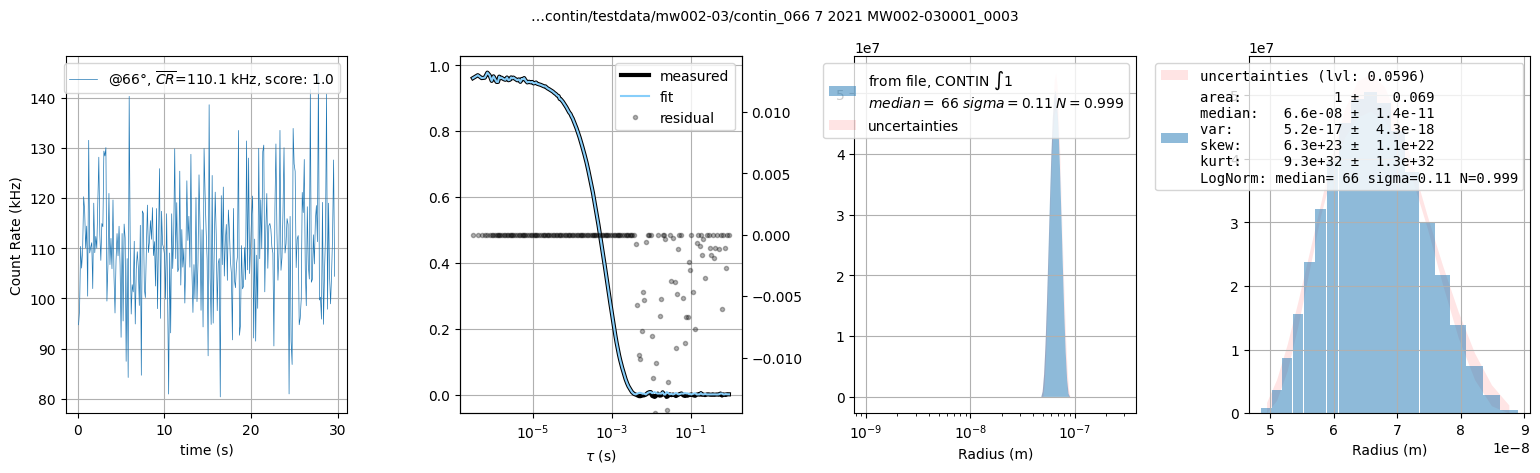

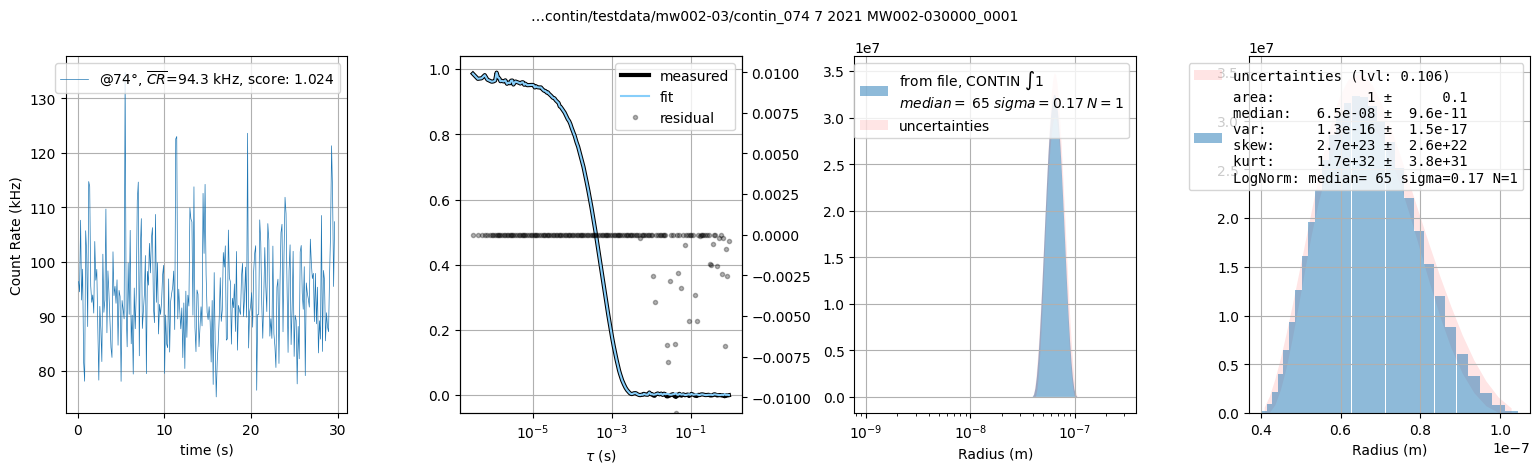

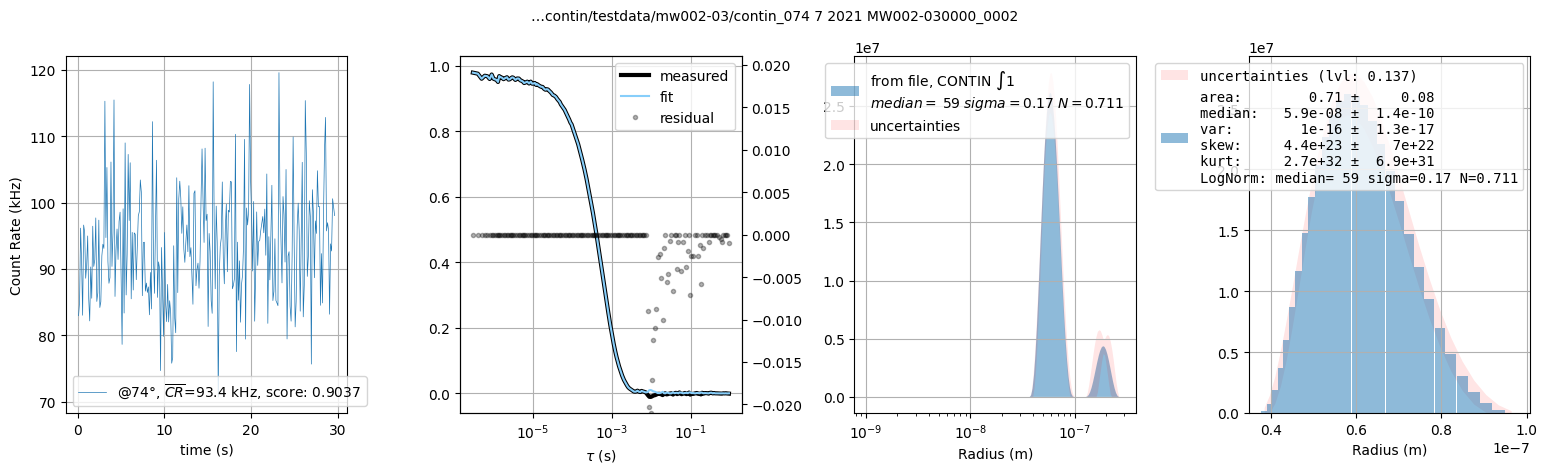

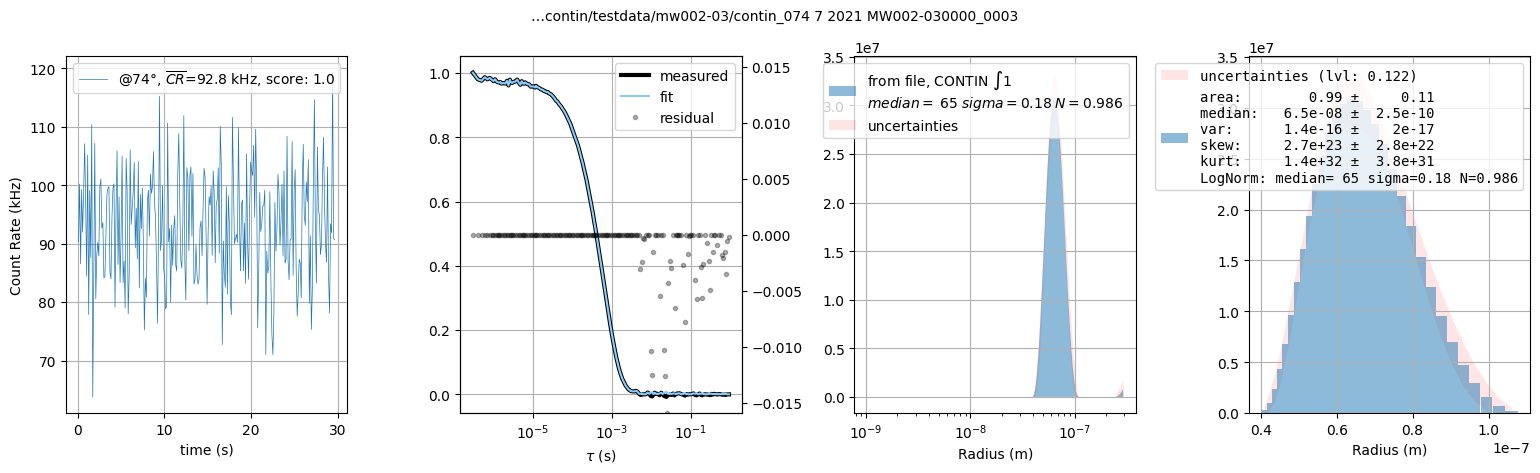

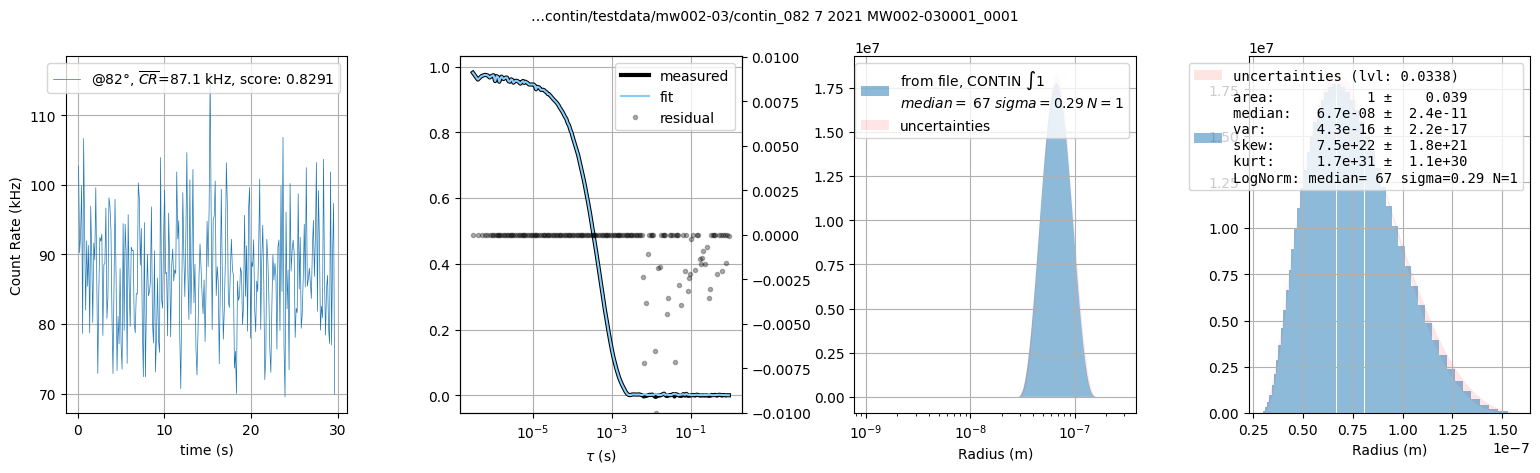

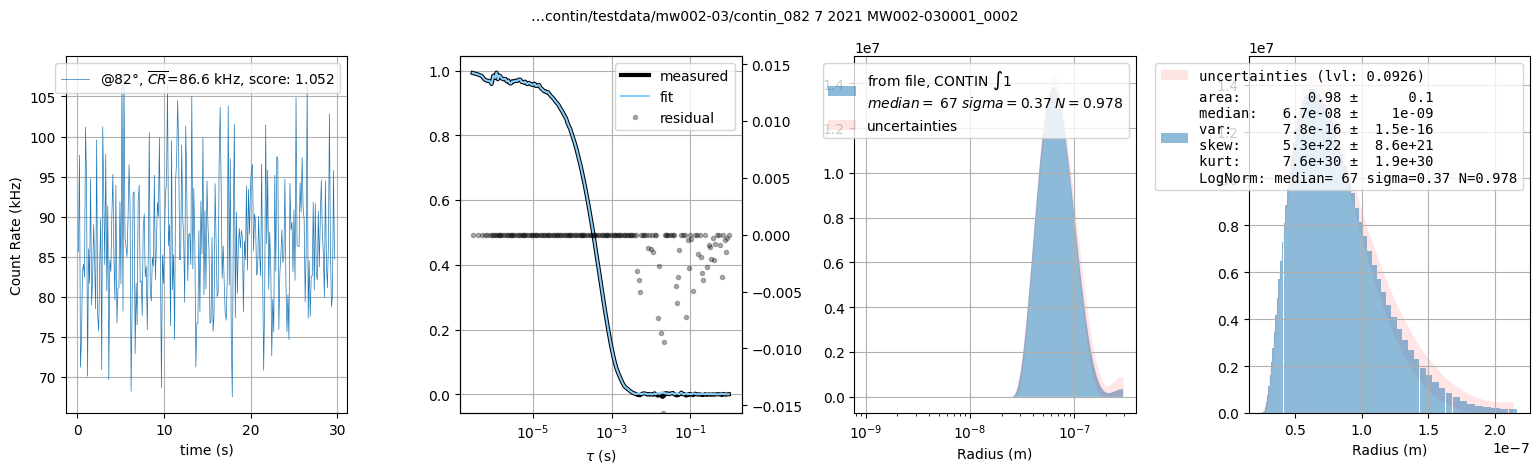

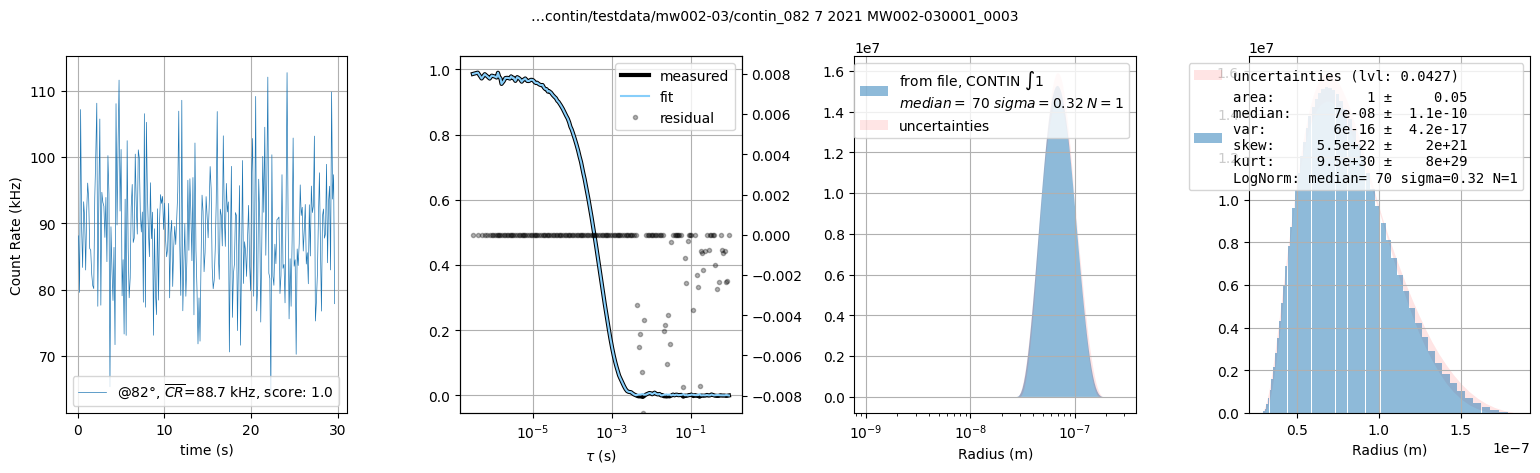

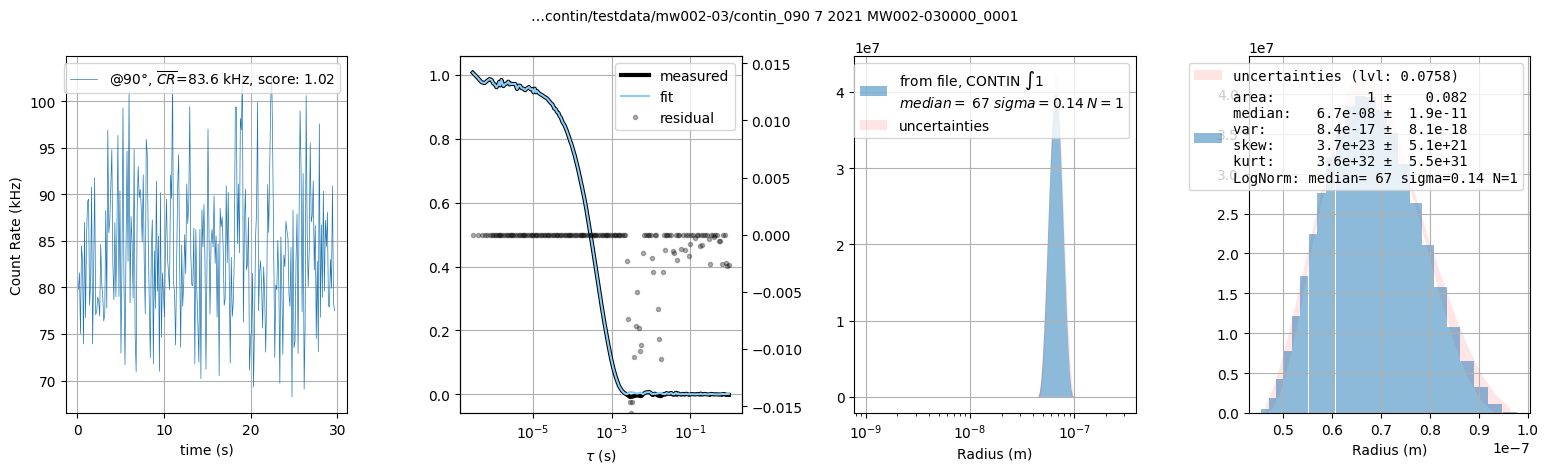

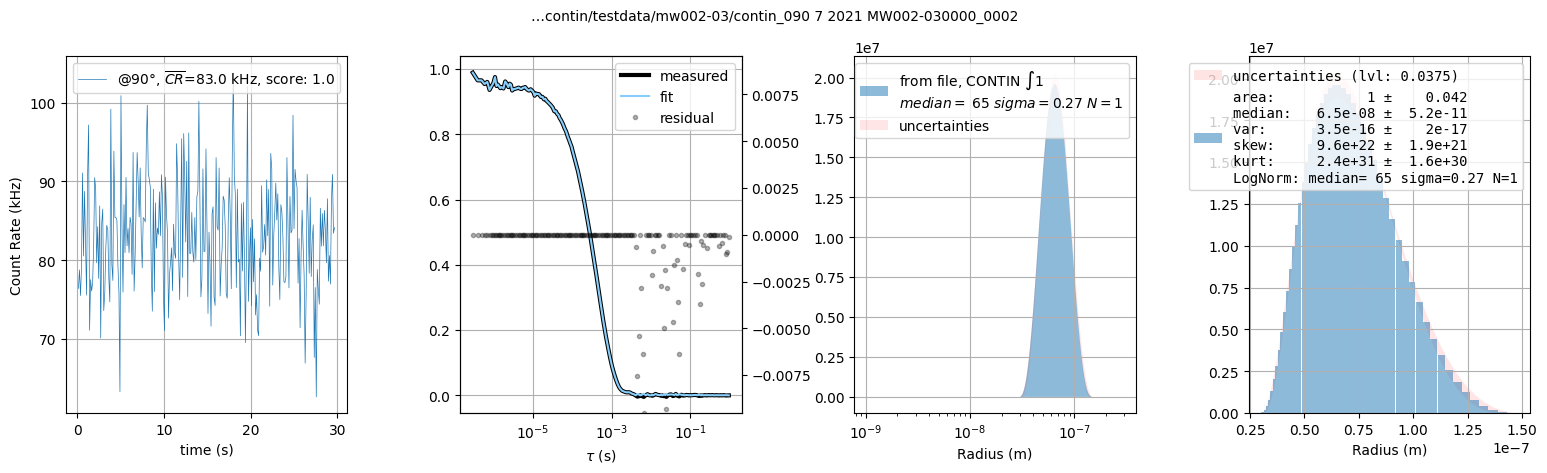

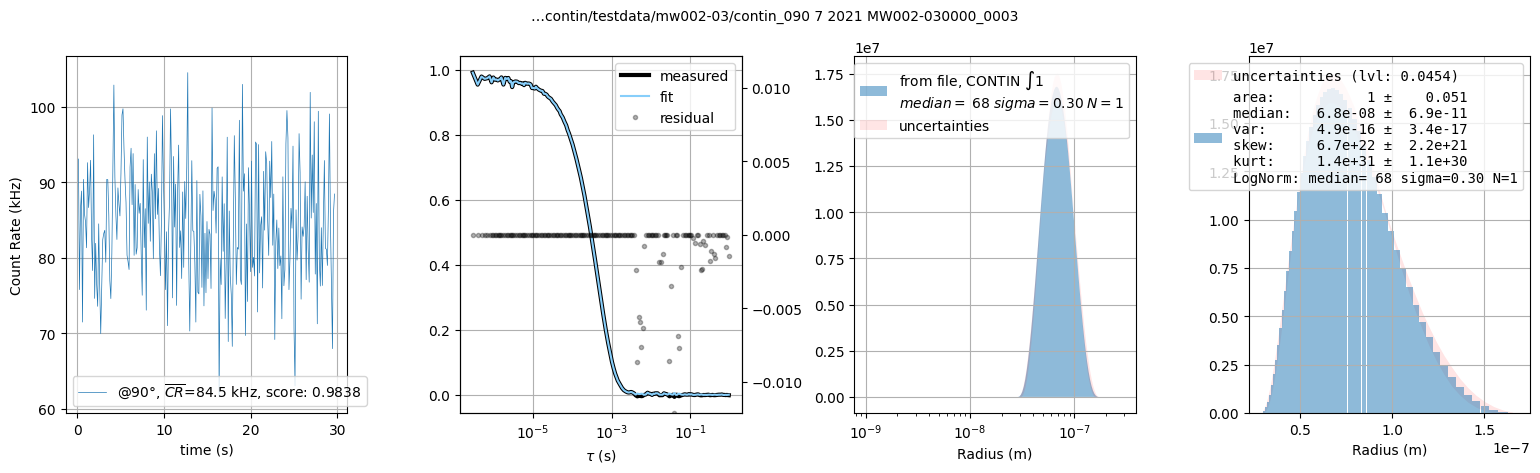

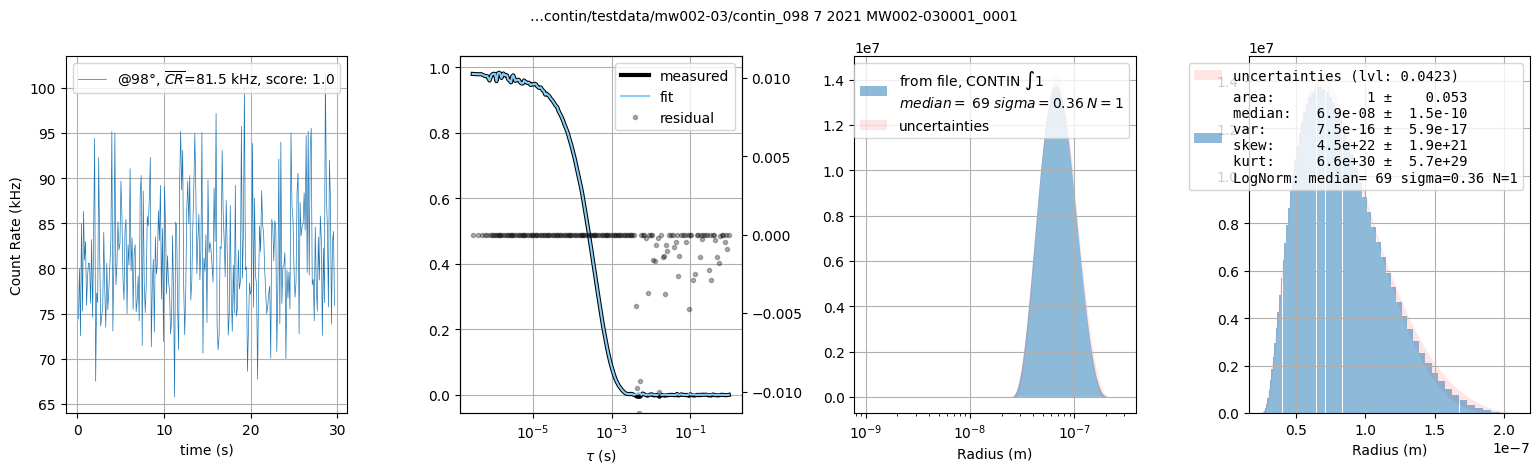

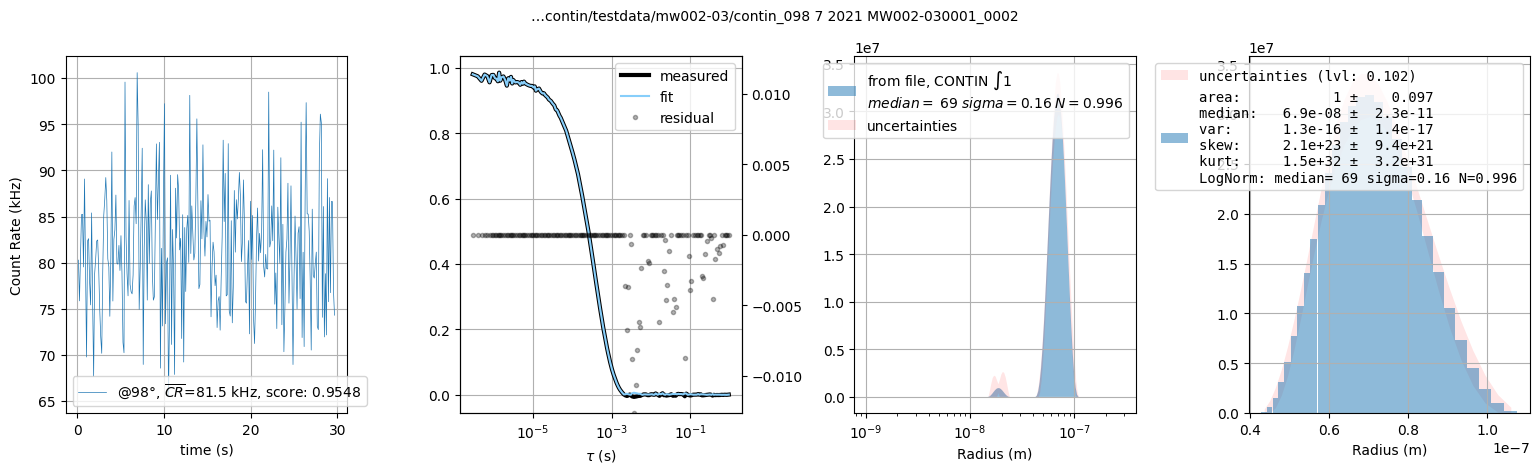

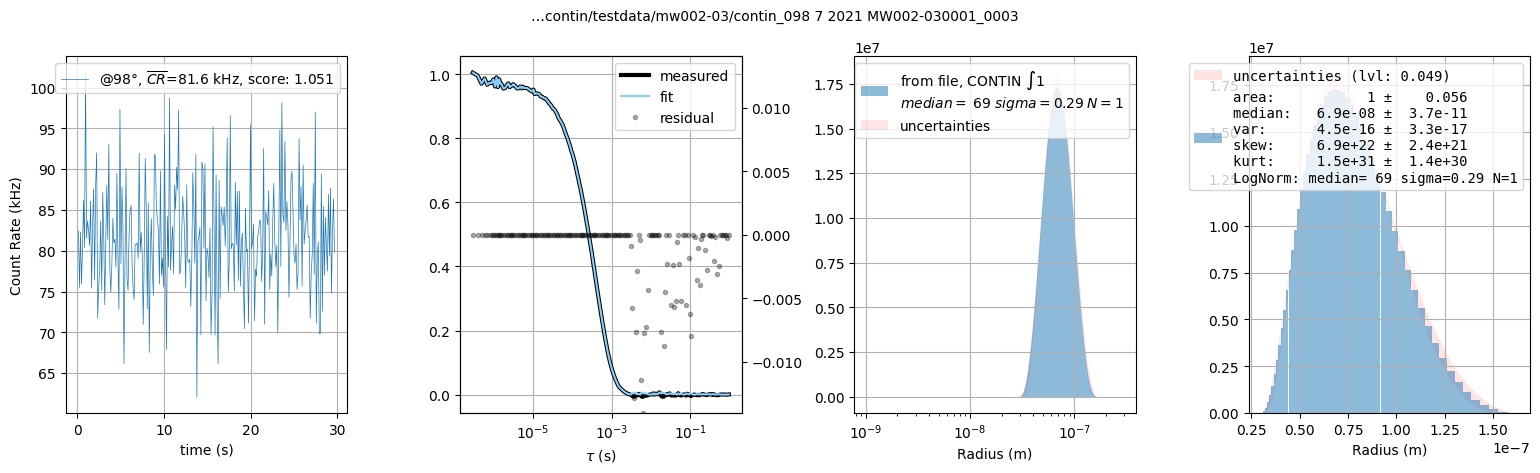

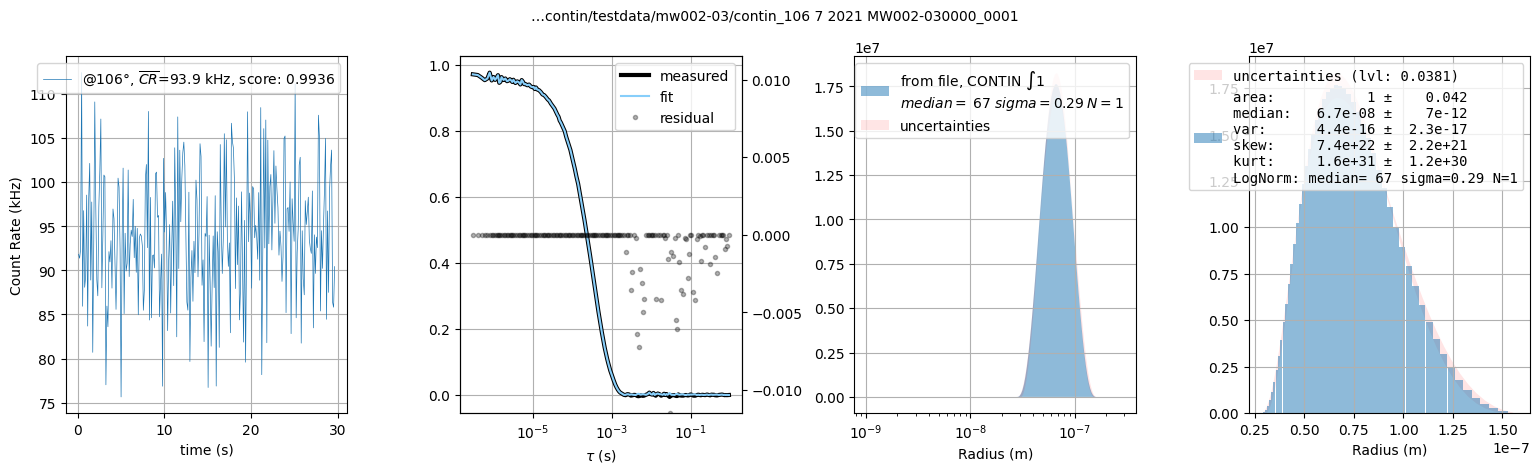

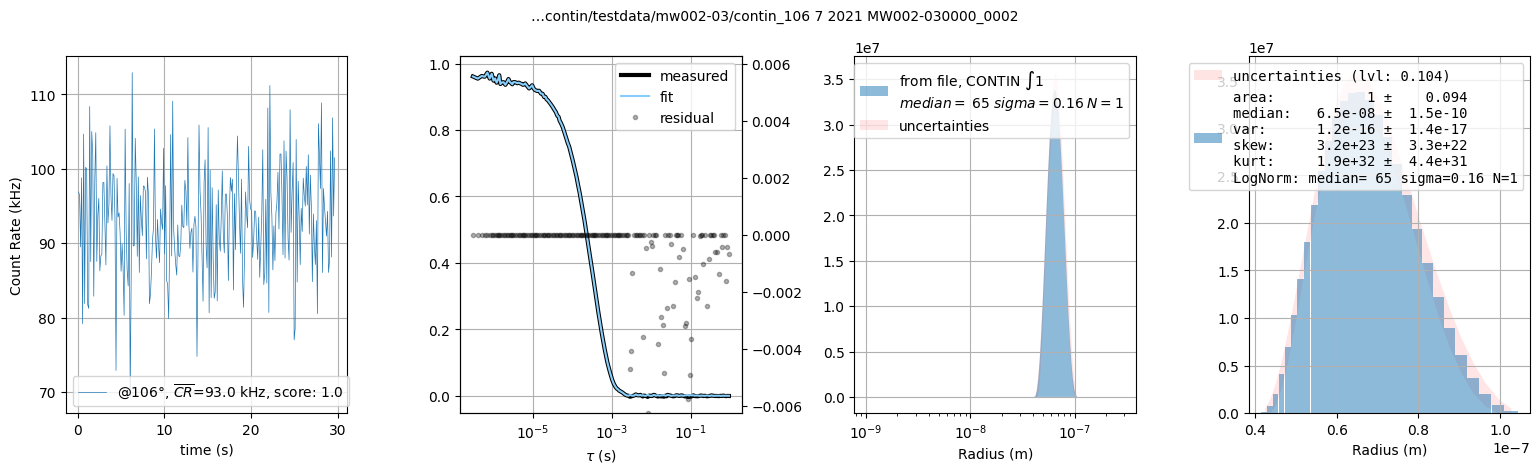

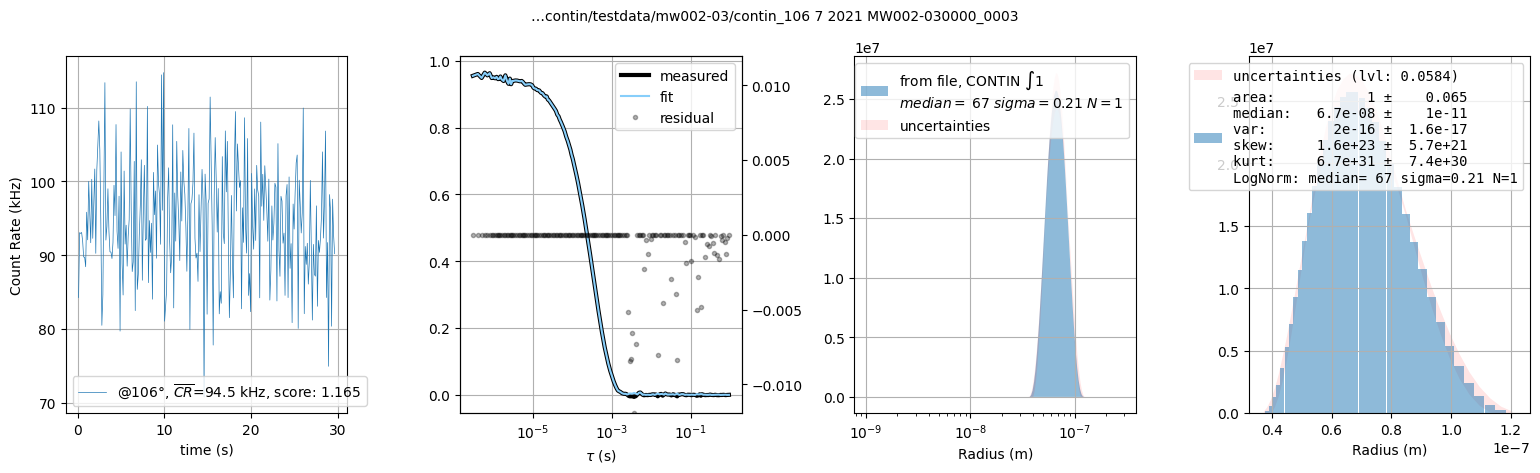

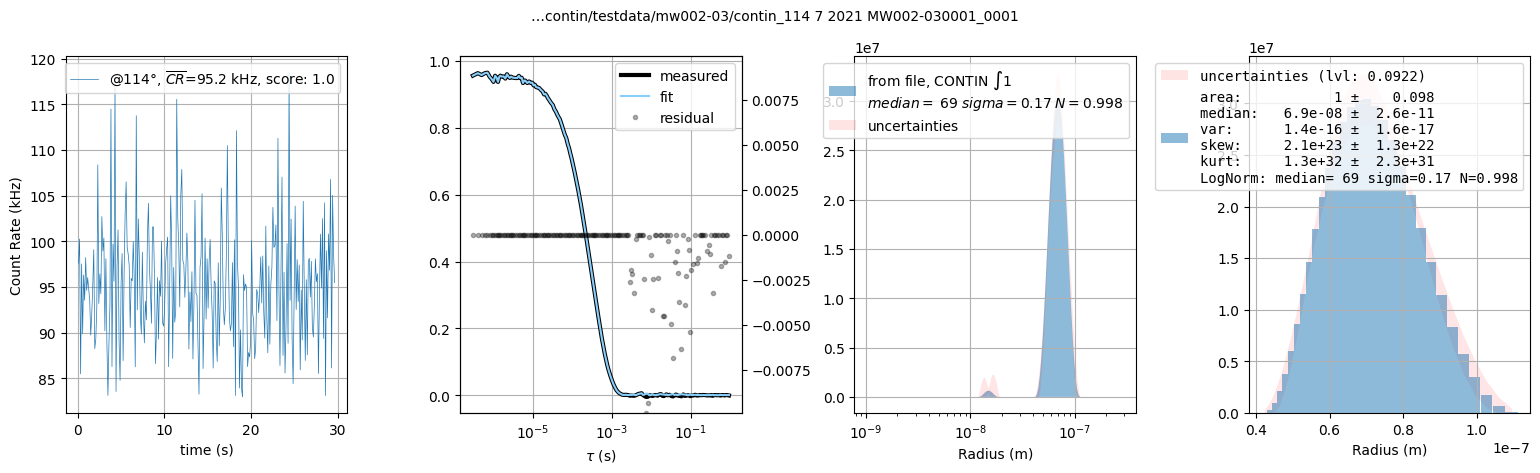

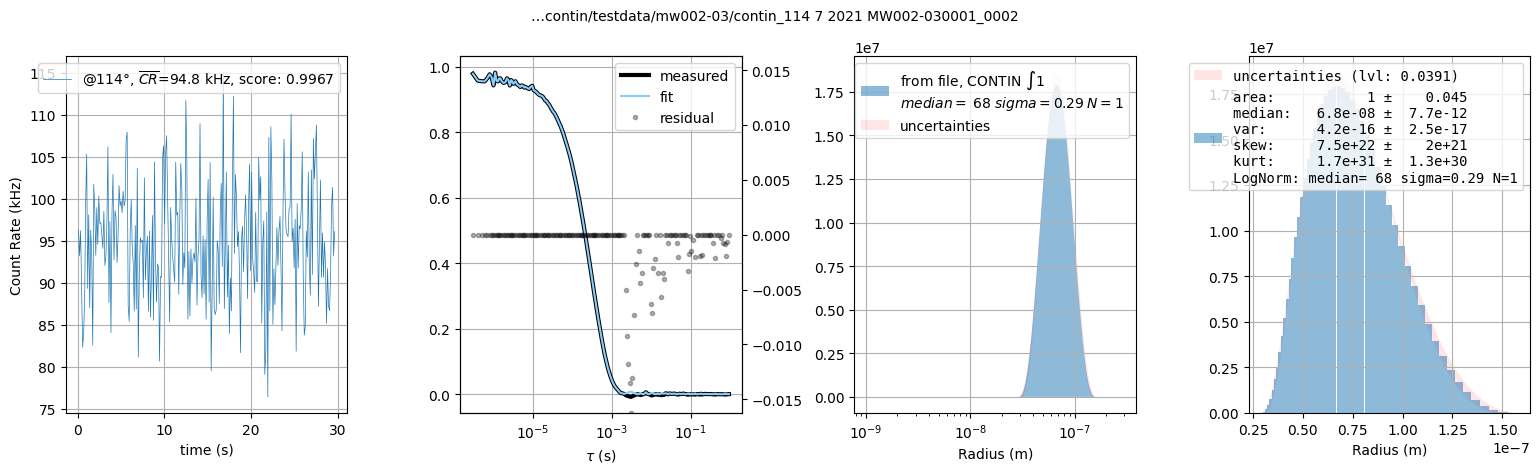

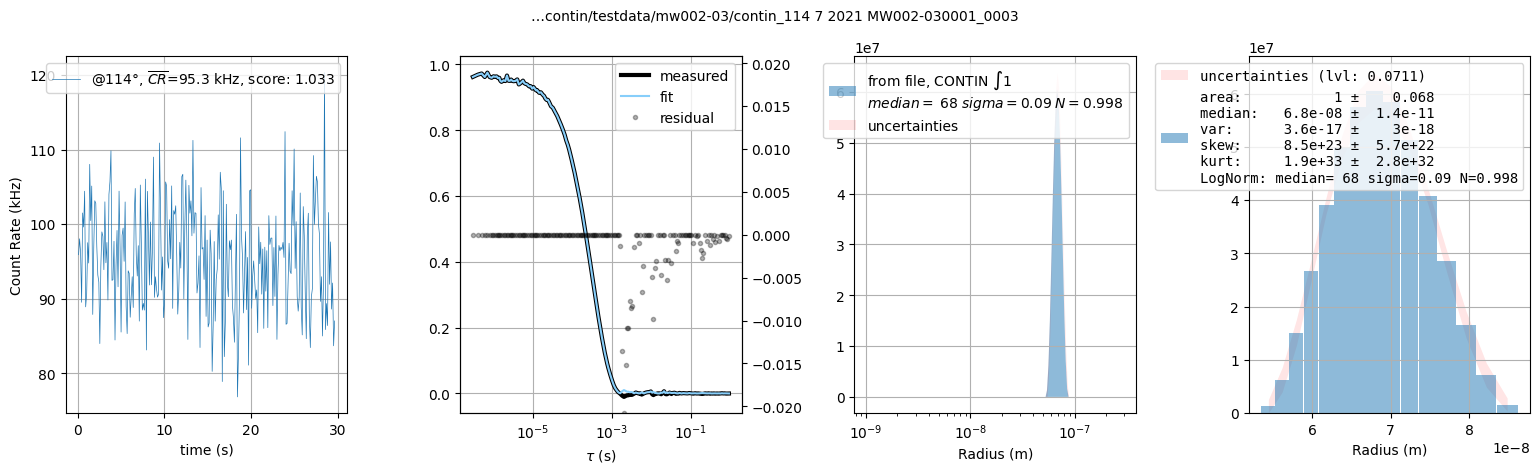

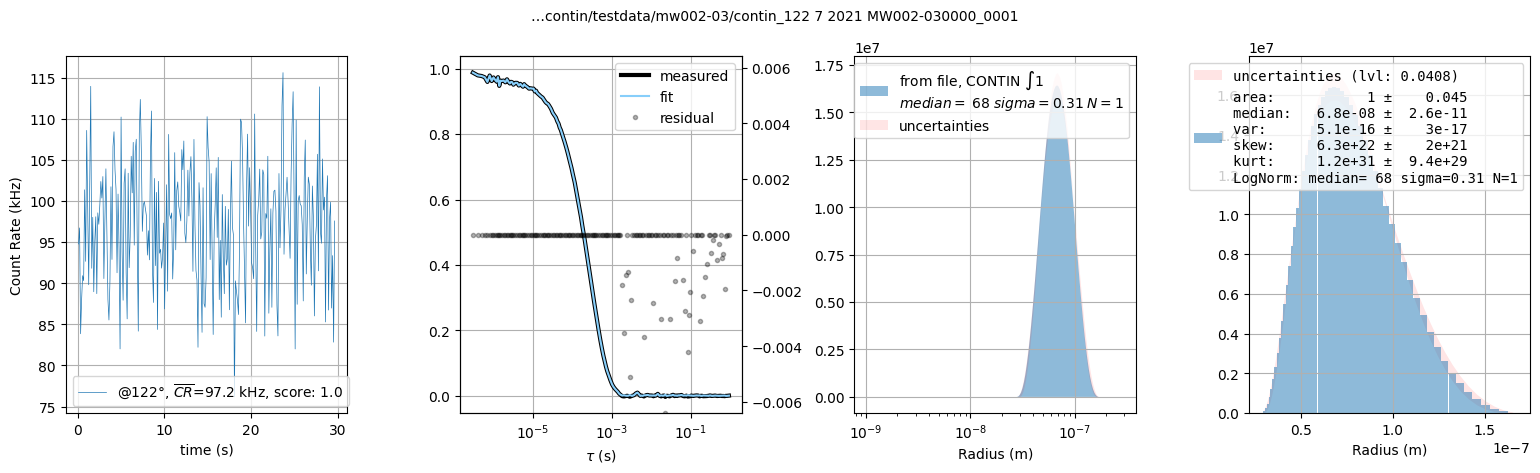

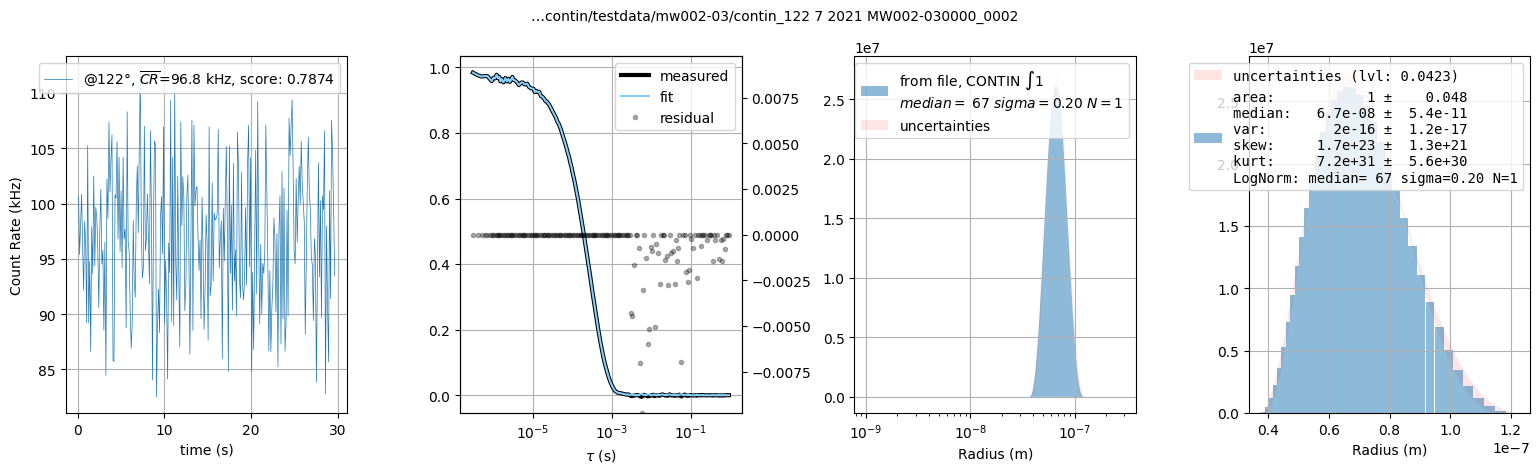

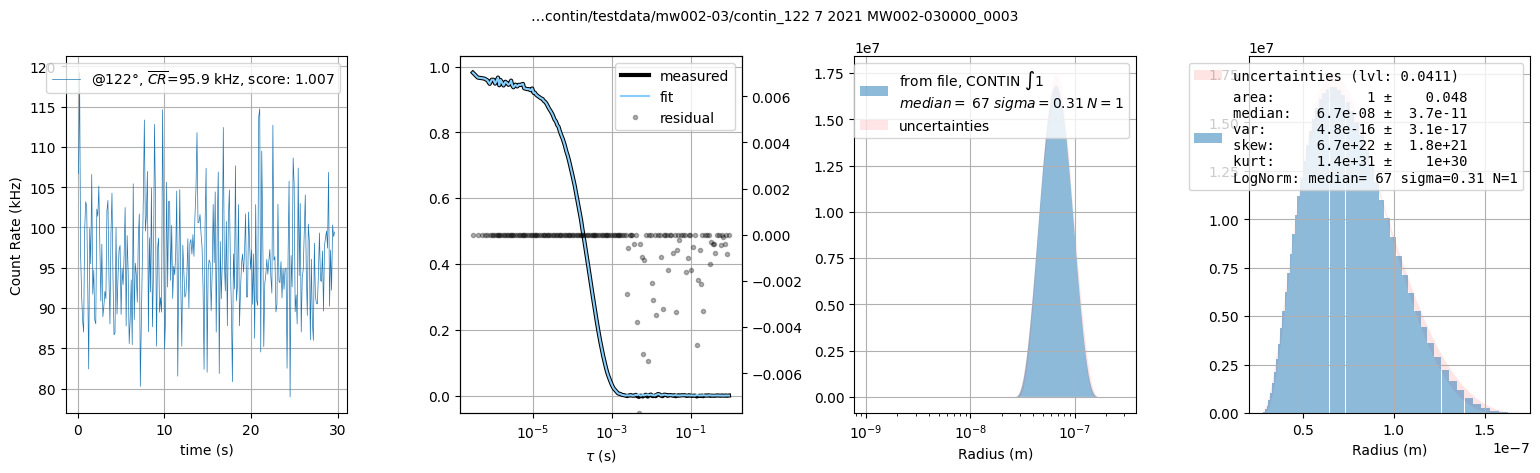

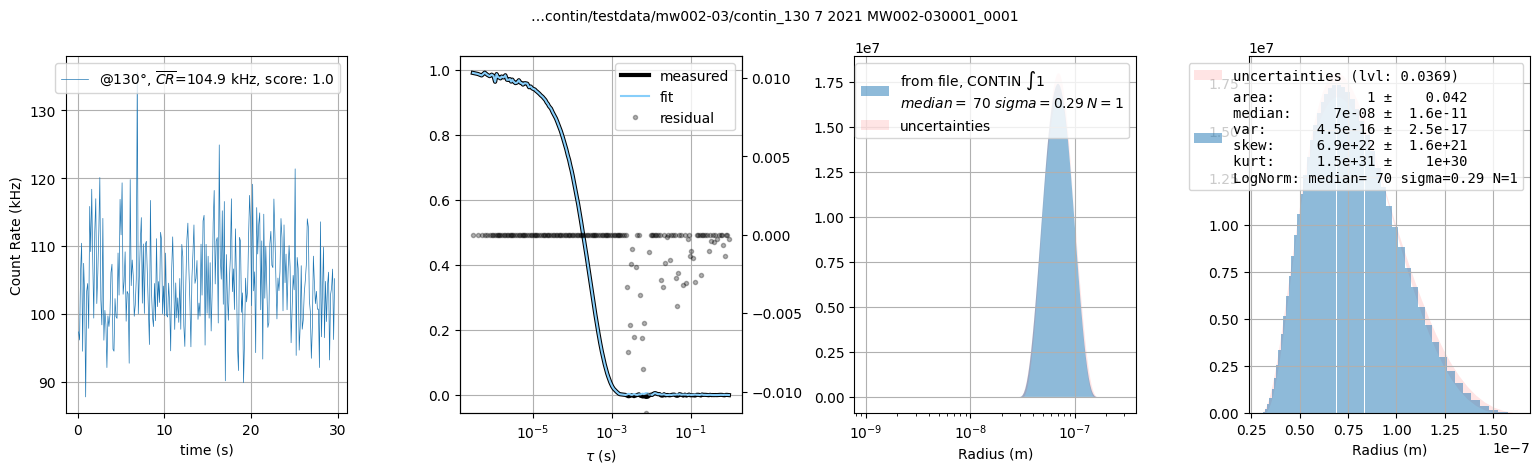

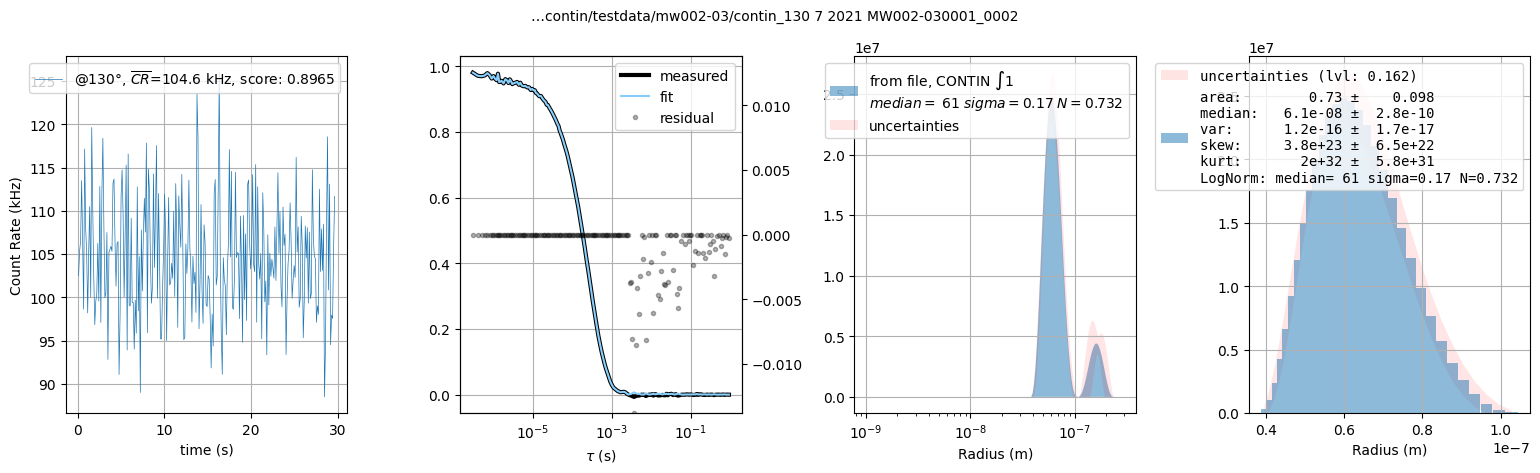

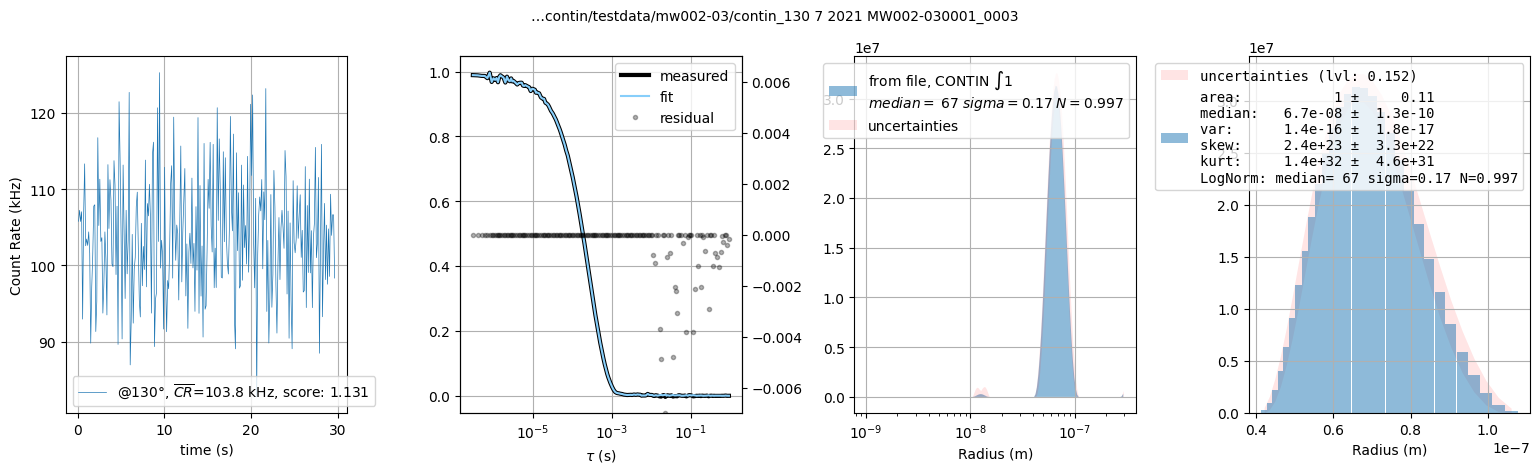

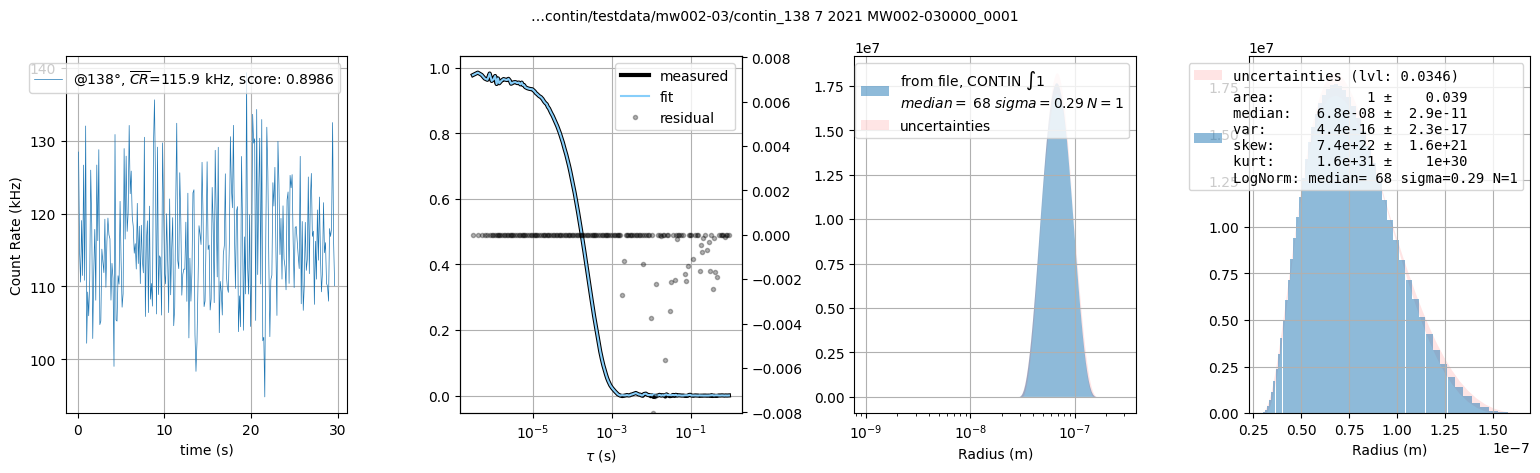

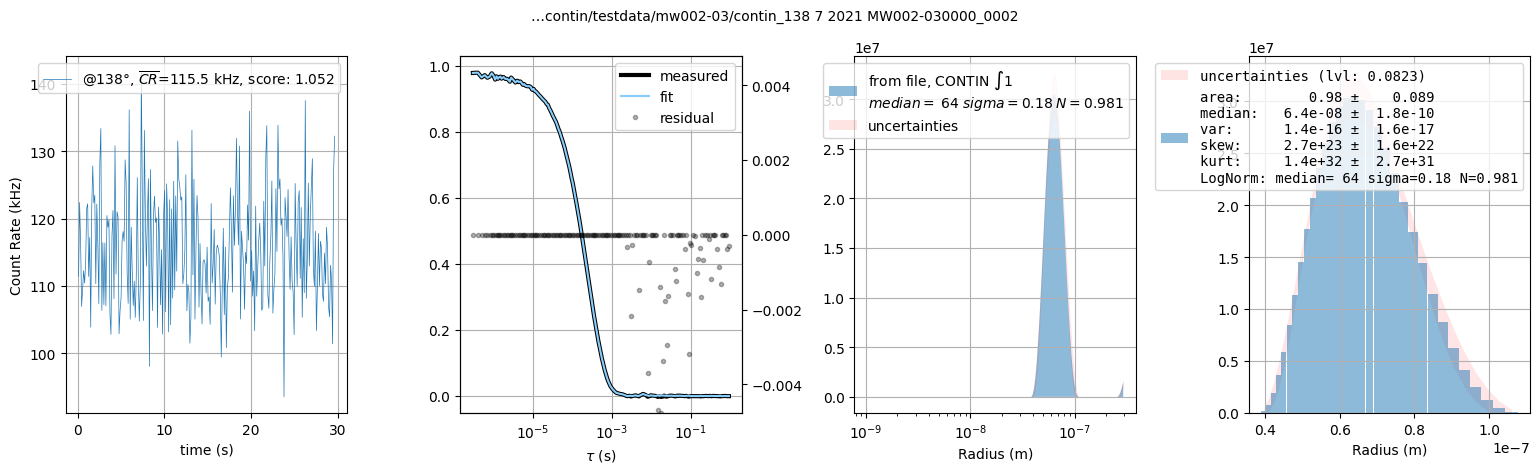

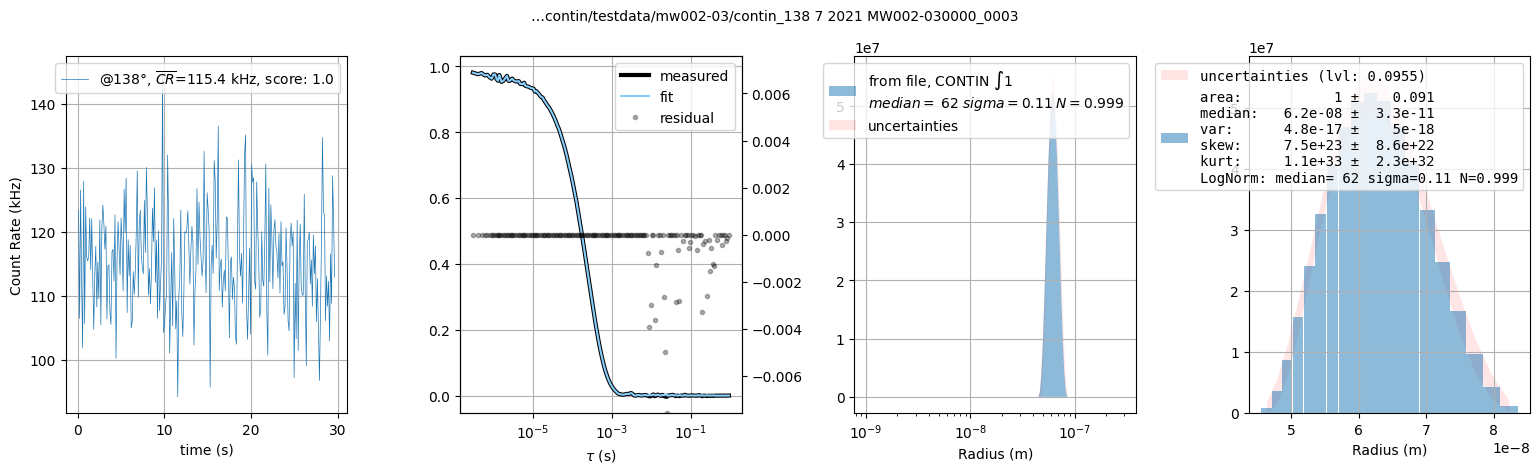

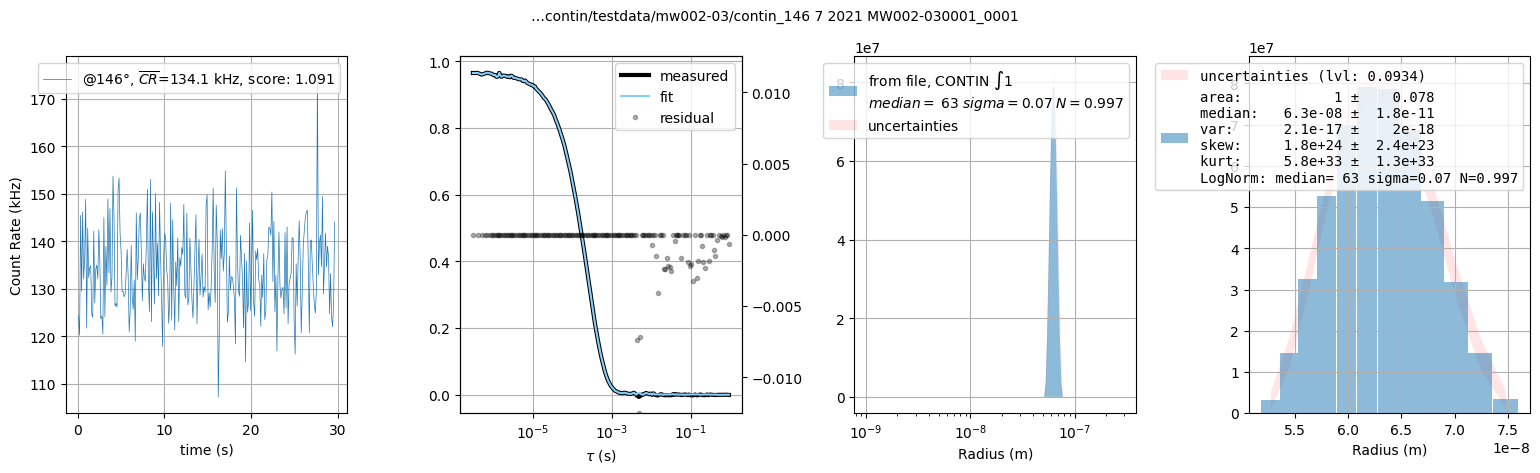

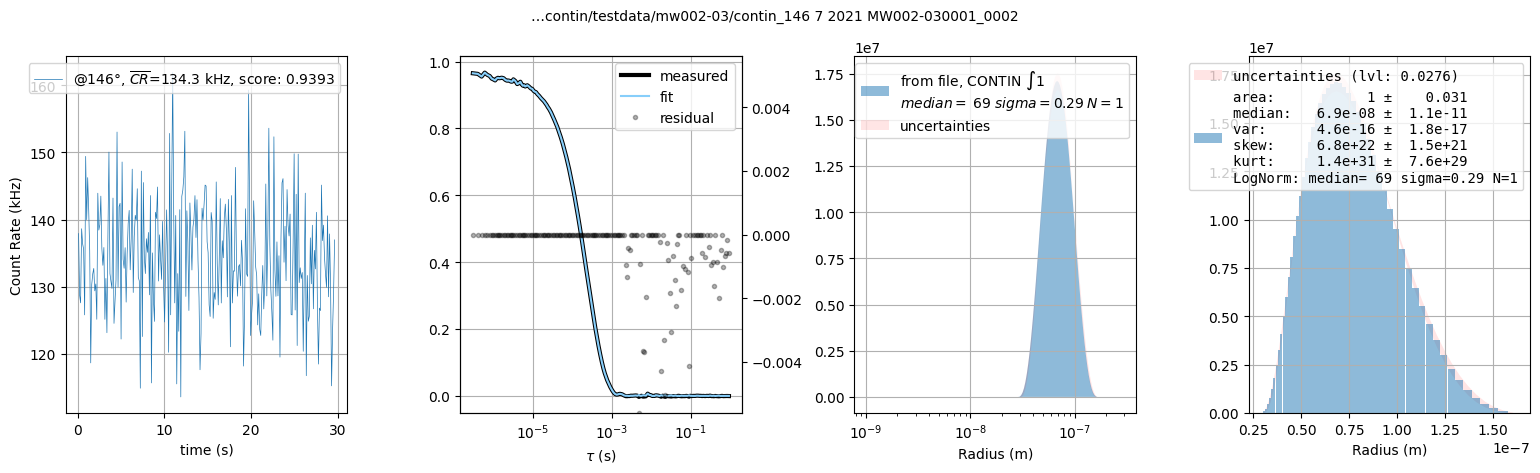

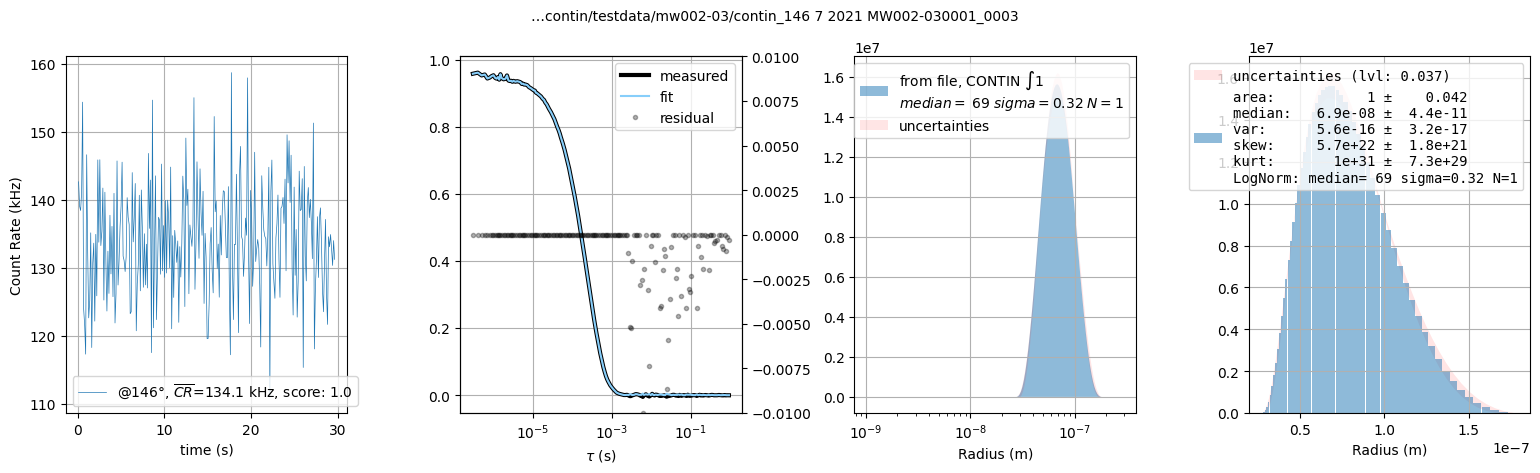

In [14]:
results = [plotResult(resultDir, withCountRate=True) for resultDir in sorted(resultDirs)]